# BANK CHURNERS

In this project, supervised models will be created to predict which users are more likely to churn and stop using bank. The most important factors that prevent users from churning and keep them retained in the system will be identified. 

The dataset (Churn-Dataset) contains information about service usage, customer plans, and the target variable which indicates whether a user churned or not. 

The main columns of data set:
* **attrition_flag:** (categoric) Existing and Attrited Customer (target variable)
* **customer_age:** (continuous) Age of customer (26-73)
* **gender:** (categoric) Gender of customer (F, M)
* **education_level:** (categoric) Education level of customer (Graduate, High School, Uneducated, College, Post-Graduate, Doctorate)
* **marital_status:** (categoric) Marital status of customer (Married, Single, Divorced)
* **income_category:** (categoric) Income category of customer (Less than 40K, 40K - 60K, 80K - 120K, 60K - 80K, 120K+)
* **card_category:** (categoric) Card category of customer (Blue, Silver, Gold, Platinum)
* **dependent_count:** (discrete) number of dependents a user has. That is, how many people are dependent on a credit card user for financial support. A higher count tells us that the expenditures can be high. (0-5)
* **Months_on_book:** (continuous) Period of relationship with bank (13-56)
* **Total_Relationship_Count:** (discrete) Total number of products held by the customer (1-6)
* **Months_Inactive_12_mon:** (discrete) Number of months inactive in the last 12 months (0-6)
* **Contacts_Count_12_mon:** (discrete) Number of Contacts in the last 12 months (0-6)
* **Credit_Limit:** (continuous) Credit Limit on the Credit Card (1438-34516)
* **Total_Revolving_Bal:** (continuous) Total Revolving Balance on the Credit Card (0-2517)
* **Avg_Open_To_Buy:** (continuous) Open to Buy Credit Line (Average of last 12 months) (3000-34516)
* **Total_Amt_Chng_Q4_Q1:** (continuous) Change in Transaction Amount (Q4 over Q1) (0-3.397)
* **Total_Trans_Amt:** (continuous) Total Transaction Amount (Last 12 months)
* **Total_Trans_Ct:** (continuous) Total Transaction Count (Last 12 months)
* **Total_Ct_Chng_Q4_Q1:** (continuous) Change in Transaction Count (Q4 over Q1)
* **Avg_Utilization_Ratio:** (continuous) Average Card Utilization Ratio

## 1. Data Wrangling

### Import dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline
#%matplotlib notebook
#plt.rcParams["figure.figsize"] = (8,4)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc
from sklearn.metrics import roc_curve, average_precision_score, precision_recall_curve
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb
from xgboost import plot_importance
from sklearn.feature_extraction.text import TfidfVectorizer
from catboost import CatBoostClassifier

### Data Ingestion

In [3]:
df_org = pd.read_csv("BankChurners.csv")
df = df_org.copy()
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...     12691.000                  777        11914.000   
1              44  ...      8256.000                  864         7392.000   
2              36  ...      3418.000                    0         3418.000   
3              34  ...      3313.000                 2517          796.000   
4              21  ...      4716.000                    0         4716.000   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                              0.000                                                                                    
1                                              0.000                                                                                    
2                                              0.000                                                                                    
3                                              0.000                                                                                    
4                                              0.000                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                              1.000                                                                                   
1                                              1.000                                                                                   
2                                              1.000                                                                                   
3                                              1.000                                                                                   
4                                              1.000                                                                                   

[5 rows x 23 columns]

### Data Description

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

**Last two columns were dropped since these columns are not part of the original data. These columns are Naive Bayes Classifier results**

In [5]:
df = df.iloc[:,:-2]

In [6]:
df.describe().T

count          mean          std           min  \
CLIENTNUM                10127.000 739177606.334 36903783.450 708082083.000   
Customer_Age             10127.000        46.326        8.017        26.000   
Dependent_count          10127.000         2.346        1.299         0.000   
Months_on_book           10127.000        35.928        7.986        13.000   
Total_Relationship_Count 10127.000         3.813        1.554         1.000   
Months_Inactive_12_mon   10127.000         2.341        1.011         0.000   
Contacts_Count_12_mon    10127.000         2.455        1.106         0.000   
Credit_Limit             10127.000      8631.954     9088.777      1438.300   
Total_Revolving_Bal      10127.000      1162.814      814.987         0.000   
Avg_Open_To_Buy          10127.000      7469.140     9090.685         3.000   
Total_Amt_Chng_Q4_Q1     10127.000         0.760        0.219         0.000   
Total_Trans_Amt          10127.000      4404.086     3397.129       510.000   
Total_Trans_Ct           10127.000        64.859       23.473        10.000   
Total_Ct_Chng_Q4_Q1      10127.000         0.712        0.238         0.000   
Avg_Utilization_Ratio    10127.000         0.275        0.276         0.000   

                                   25%           50%           75%  \
CLIENTNUM                713036770.500 717926358.000 773143533.000   
Customer_Age                    41.000        46.000        52.000   
Dependent_count                  1.000         2.000         3.000   
Months_on_book                  31.000        36.000        40.000   
Total_Relationship_Count         3.000         4.000         5.000   
Months_Inactive_12_mon           2.000         2.000         3.000   
Contacts_Count_12_mon            2.000         2.000         3.000   
Credit_Limit                  2555.000      4549.000     11067.500   
Total_Revolving_Bal            359.000      1276.000      1784.000   
Avg_Open_To_Buy               1324.500      3474.000      9859.000   
Total_Amt_Chng_Q4_Q1             0.631         0.736         0.859   
Total_Trans_Amt               2155.500      3899.000      4741.000   
Total_Trans_Ct                  45.000        67.000        81.000   
Total_Ct_Chng_Q4_Q1              0.582         0.702         0.818   
Avg_Utilization_Ratio            0.023         0.176         0.503   

                                   max  
CLIENTNUM                828343083.000  
Customer_Age                    73.000  
Dependent_count                  5.000  
Months_on_book                  56.000  
Total_Relationship_Count         6.000  
Months_Inactive_12_mon           6.000  
Contacts_Count_12_mon            6.000  
Credit_Limit                 34516.000  
Total_Revolving_Bal           2517.000  
Avg_Open_To_Buy              34516.000  
Total_Amt_Chng_Q4_Q1             3.397  
Total_Trans_Amt              18484.000  
Total_Trans_Ct                 139.000  
Total_Ct_Chng_Q4_Q1              3.714  
Avg_Utilization_Ratio            0.999

In [7]:
df.describe(include = 'object').T

count unique                top  freq
Attrition_Flag   10127      2  Existing Customer  8500
Gender           10127      2                  F  5358
Education_Level  10127      7           Graduate  3128
Marital_Status   10127      4            Married  4687
Income_Category  10127      6     Less than $40K  3561
Card_Category    10127      4               Blue  9436

**Rename Columns**

In [8]:
df.columns = df.columns.str.lower()

## 2. Data Cleaning and Outlier Analysis

**Client_num column was dropped since it is unique for every custom and it does not effect clients behaviours.**

In [9]:
df.drop('clientnum', axis=1, inplace=True)

In [10]:
df.isnull().sum()

attrition_flag              0
customer_age                0
gender                      0
dependent_count             0
education_level             0
marital_status              0
income_category             0
card_category               0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
contacts_count_12_mon       0
credit_limit                0
total_revolving_bal         0
avg_open_to_buy             0
total_amt_chng_q4_q1        0
total_trans_amt             0
total_trans_ct              0
total_ct_chng_q4_q1         0
avg_utilization_ratio       0
dtype: int64

**There is no null value in columns.**

### Categoric Columns

In [11]:
cat_columns = df.select_dtypes(include = 'object').columns[1:]

In [12]:
print("Categoric features: ", cat_columns.values)


Categoric features:  ['gender' 'education_level' 'marital_status' 'income_category'
 'card_category']


In [13]:
df['attrition_flag'].value_counts(dropna=False)

Existing Customer    8500
Attrited Customer    1627
Name: attrition_flag, dtype: int64

In [14]:
df['gender'].value_counts(dropna=False)

F    5358
M    4769
Name: gender, dtype: int64

In [15]:
df["education_level"].value_counts(dropna=False)

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: education_level, dtype: int64

In [16]:
df["marital_status"].value_counts(dropna=False)

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: marital_status, dtype: int64

In [17]:
df["income_category"].value_counts(dropna=False)

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: income_category, dtype: int64

In [18]:
df["card_category"].value_counts(dropna=False)

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: card_category, dtype: int64

**It is seem that there are null values in the columns education_level, marital_status and income_category. These null values were assigned as 'Unknown'. These values will be filled the most frequent values in appropriate groups.**

### Fill null values of categoric columns

#### Income

Null values of income category will be filled according to the columns credit_limit and total_transanction_amount. Since these columns are continuous, they will be group by pd.qcut method. Then null values filled by most frequent values of these groups.

In [19]:
df["income_category"] = df["income_category"].replace("Unknown", np.nan)

In [20]:
m_qcut_tta = df[["total_trans_amt"]]
df["m_qcut_tta"] = pd.qcut(m_qcut_tta["total_trans_amt"], q = 45, duplicates='drop')

# Divide total_trans_amt into 45 groups. Since there are some duplicates, group number is less than 45.

In [21]:
m_qcut_cl = df[["credit_limit"]]
df["m_qcut_cl"] = pd.qcut(m_qcut_cl["credit_limit"], q = 45, duplicates='drop')

# Divide credit_limit into 45 groups. Since there are some duplicates, group number is less than 45.

In [22]:
mode_group_income = df.groupby(["m_qcut_cl","m_qcut_tta" ])['income_category'].\
                            transform(lambda x: x.mode()[0] if list(x.mode()) != [] else np.nan)

In [23]:
df["income_category"].fillna(mode_group_income, inplace=True)

# Fill income groups by transform list that is created 
# according to the groups of credit_limit and total_trans_amt with most frequent values of income.

In [24]:
mode_group_income2 = df.groupby(["m_qcut_cl" ])['income_category'].\
                            transform(lambda x: x.mode()[0] if list(x.mode()) != [] else np.nan)

In [25]:
df["income_category"].fillna(mode_group_income2, inplace=True)

# Since not all null values were filled, fill the rest according to only credit limit groups.

In [26]:
df["income_category"].value_counts(normalize=True)

Less than $40K   0.390
$40K - $60K      0.201
$80K - $120K     0.170
$60K - $80K      0.153
$120K +          0.086
Name: income_category, dtype: float64

In [27]:
df.drop(["m_qcut_cl","m_qcut_tta" ], axis=1, inplace=True)

# Drop qcut columns

**Since there is no meaningful data to fill the columns education_level and married_status, their null values were not filled. Since education level and marital status has a very small effect on attrition_flag, this dos not effect model.**

In [28]:
df["edu2"] = df.education_level.replace(['High School', 'Graduate', 'Uneducated', 'College',
       'Post-Graduate', 'Doctorate','Unknown'],[0,1,2,3,4,5,6])

In [29]:
df.corr()["edu2"]

customer_age                0.004
dependent_count             0.010
months_on_book             -0.002
total_relationship_count   -0.005
months_inactive_12_mon     -0.008
contacts_count_12_mon      -0.002
credit_limit               -0.003
total_revolving_bal        -0.014
avg_open_to_buy            -0.002
total_amt_chng_q4_q1       -0.002
total_trans_amt            -0.004
total_trans_ct             -0.003
total_ct_chng_q4_q1        -0.007
avg_utilization_ratio      -0.006
edu2                        1.000
Name: edu2, dtype: float64

In [30]:
df.marital_status.unique()

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

In [31]:
df["marital2"] = df.marital_status.replace(['Married', 'Single', 'Unknown', 'Divorced'],[0,1,3,2])

In [32]:
df.corr()["marital2"]

customer_age               -0.055
dependent_count             0.019
months_on_book             -0.043
total_relationship_count   -0.012
months_inactive_12_mon      0.002
contacts_count_12_mon      -0.009
credit_limit                0.054
total_revolving_bal        -0.024
avg_open_to_buy             0.056
total_amt_chng_q4_q1       -0.039
total_trans_amt             0.054
total_trans_ct              0.094
total_ct_chng_q4_q1        -0.009
avg_utilization_ratio      -0.045
edu2                        0.007
marital2                    1.000
Name: marital2, dtype: float64

There is a very small correlation between education level and marital status with other columns. So there is no meaningful column to fill these columns.

In [33]:
df.drop(["edu2","marital2"],axis=1,inplace=True)

### Numeric Columns

In [34]:
num_columns = df.select_dtypes(include = 'number').columns.values
num_columns

array(['customer_age', 'dependent_count', 'months_on_book',
       'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt',
       'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio'],
      dtype=object)

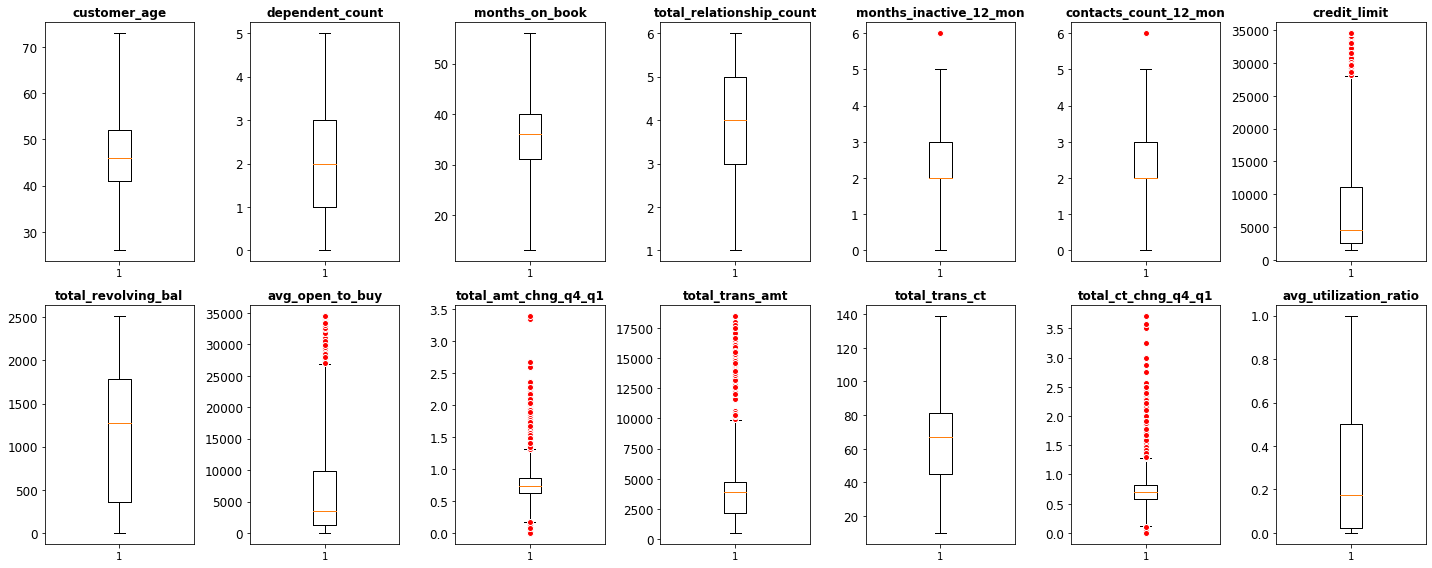

In [35]:
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(2, 7, figsize=(20,8))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df[num_columns[i]], flierprops=red_circle, whis=2)
    ax.set_title(num_columns[i], fontsize=12, fontweight='bold')
    ax.tick_params(axis='y', labelsize=12)
    
plt.tight_layout()

In [36]:
df["dependent_count"].value_counts(dropna=False)

3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: dependent_count, dtype: int64

In [37]:
df["months_on_book"].describe()

count   10127.000
mean       35.928
std         7.986
min        13.000
25%        31.000
50%        36.000
75%        40.000
max        56.000
Name: months_on_book, dtype: float64

In [38]:
df["total_relationship_count"].value_counts(dropna=False)

3    2305
4    1912
5    1891
6    1866
2    1243
1     910
Name: total_relationship_count, dtype: int64

In [39]:
df["months_inactive_12_mon"].value_counts(dropna=False) 

3    3846
2    3282
1    2233
4     435
5     178
6     124
0      29
Name: months_inactive_12_mon, dtype: int64

In [40]:
df["contacts_count_12_mon"].value_counts(dropna=False) 

3    3380
2    3227
1    1499
4    1392
0     399
5     176
6      54
Name: contacts_count_12_mon, dtype: int64

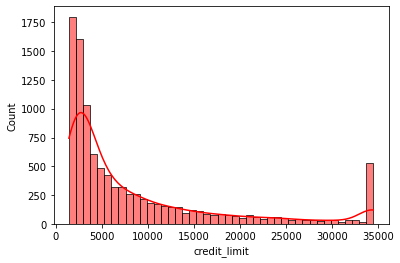

In [41]:
sns.histplot(df['credit_limit'], kde=True,color="red");

**credit limit column has outliers but these outliers are not anomaly**

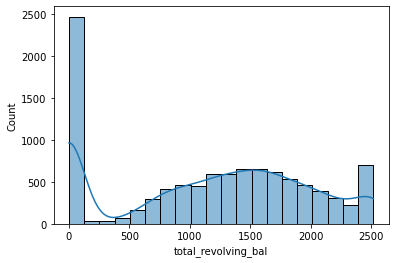

In [42]:
sns.histplot(df['total_revolving_bal'], kde=True);

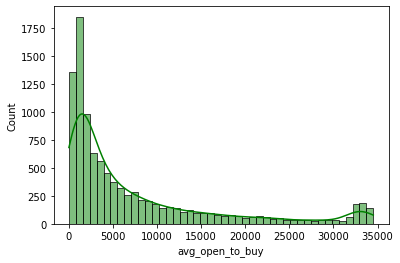

In [43]:
sns.histplot(df['avg_open_to_buy'], kde=True, color="green");

avg_open_to_buy has also outliers but these are not anomaly.

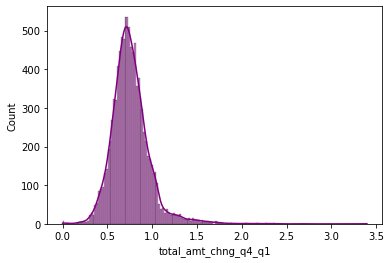

In [44]:
sns.histplot(df['total_amt_chng_q4_q1'], kde=True, color="purple");

In [45]:
df[df['total_amt_chng_q4_q1']>2.5]

attrition_flag  customer_age gender  dependent_count education_level  \
2    Existing Customer            51      M                3        Graduate   
8    Existing Customer            37      M                3      Uneducated   
12   Existing Customer            56      M                1         College   
773  Existing Customer            61      M                0   Post-Graduate   

    marital_status income_category card_category  months_on_book  \
2          Married    $80K - $120K          Blue              36   
8           Single     $60K - $80K          Blue              36   
12          Single    $80K - $120K          Blue              36   
773        Married     $60K - $80K          Blue              53   

     total_relationship_count  months_inactive_12_mon  contacts_count_12_mon  \
2                           4                       1                      0   
8                           5                       2                      0   
12                          3                       6                      0   
773                         6                       2                      3   

     credit_limit  total_revolving_bal  avg_open_to_buy  total_amt_chng_q4_q1  \
2        3418.000                    0         3418.000                 2.594   
8       22352.000                 2517        19835.000                 3.355   
12      11751.000                    0        11751.000                 3.397   
773     14434.000                 1927        12507.000                 2.675   

     total_trans_amt  total_trans_ct  total_ct_chng_q4_q1  \
2               1887              20                2.333   
8               1350              24                1.182   
12              1539              17                3.250   
773             1731              32                3.571   

     avg_utilization_ratio  
2                    0.000  
8                    0.113  
12                   0.000  
773                  0.134

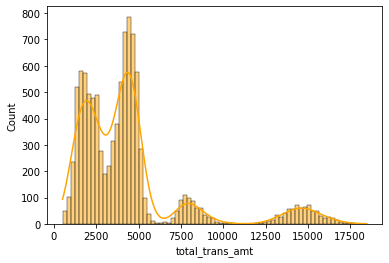

In [46]:
sns.histplot(df['total_trans_amt'], kde=True, color="orange");

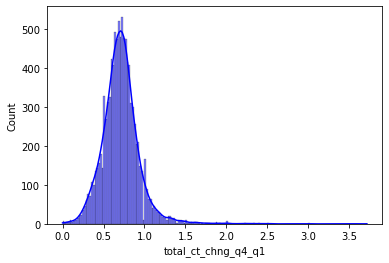

In [47]:
sns.histplot(df['total_ct_chng_q4_q1'], kde=True, color="blue");

In [48]:
df[df['total_amt_chng_q4_q1']>2.5]

attrition_flag  customer_age gender  dependent_count education_level  \
2    Existing Customer            51      M                3        Graduate   
8    Existing Customer            37      M                3      Uneducated   
12   Existing Customer            56      M                1         College   
773  Existing Customer            61      M                0   Post-Graduate   

    marital_status income_category card_category  months_on_book  \
2          Married    $80K - $120K          Blue              36   
8           Single     $60K - $80K          Blue              36   
12          Single    $80K - $120K          Blue              36   
773        Married     $60K - $80K          Blue              53   

     total_relationship_count  months_inactive_12_mon  contacts_count_12_mon  \
2                           4                       1                      0   
8                           5                       2                      0   
12                          3                       6                      0   
773                         6                       2                      3   

     credit_limit  total_revolving_bal  avg_open_to_buy  total_amt_chng_q4_q1  \
2        3418.000                    0         3418.000                 2.594   
8       22352.000                 2517        19835.000                 3.355   
12      11751.000                    0        11751.000                 3.397   
773     14434.000                 1927        12507.000                 2.675   

     total_trans_amt  total_trans_ct  total_ct_chng_q4_q1  \
2               1887              20                2.333   
8               1350              24                1.182   
12              1539              17                3.250   
773             1731              32                3.571   

     avg_utilization_ratio  
2                    0.000  
8                    0.113  
12                   0.000  
773                  0.134

## 3. EDA

In [49]:
df["attrition_flag"].value_counts(normalize=True)

Existing Customer   0.839
Attrited Customer   0.161
Name: attrition_flag, dtype: float64

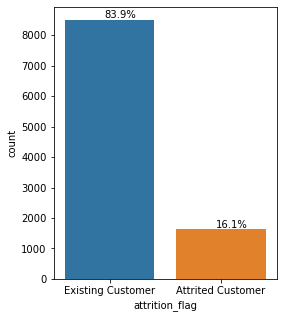

In [50]:
plt.figure(figsize=(4,5))
ax = sns.countplot(df["attrition_flag"])
total = len(df["attrition_flag"])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y+60), size = 10)
plt.show()

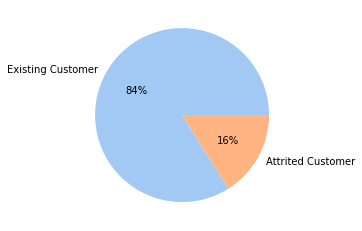

In [51]:
data = df["attrition_flag"].value_counts().values
labels = df["attrition_flag"].value_counts().index

colors = sns.color_palette('pastel')[0:5]

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

**Target variable can be admitted as imbalanced.**

In [52]:
cat_columns

Index(['gender', 'education_level', 'marital_status', 'income_category',
       'card_category'],
      dtype='object')

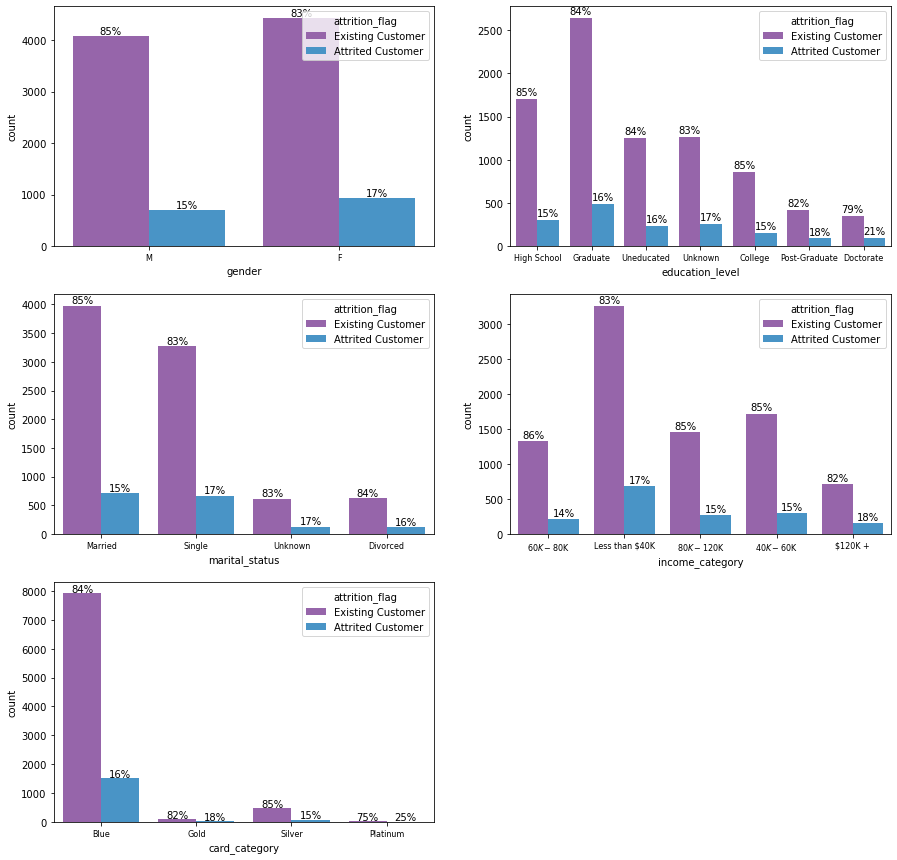

In [53]:
fig, axs = plt.subplots(3, 2, figsize=(15,15))
ax = axs.flatten()
for i in range(0,5):
    sns.countplot(df[cat_columns[i]], ax=ax[i], hue=df['attrition_flag'],palette=["#9b59b6", "#3498db"])
    ax[i].set_xticklabels(df[cat_columns[i]].unique(), fontsize=8)
    bars = ax[i].patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]

    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r
        ax[i].text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
        ax[i].text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")
ax[-1].set_visible(False)

**Some Results of Categoric Columns**
* For the target variable while the rate of existing customer is 83.9%, the rate of attrited customer is 16.1%.
* This rate is almost not change in the subcategories of gender, education level, marital status, income level and card category.
* This means that gender, education level, marital status, income level and card category have less effect on the target variable.
* In the education level, docrates rate of attrited customer is 21% which is greater than the rate of attrited customer in total.
* In the card category, platinium rate of attrited customer is 25% which is greater than the rate of attrited customer in total. But the rate platiniums in card category is 0.2% and is very low.
* In income level, '60K-80K' rate of attrited customer is 13% which is less than the rate of attrited customer in total.

In [54]:
df[df["card_category"] == "Platinum"]["attrition_flag"].value_counts()

Existing Customer    15
Attrited Customer     5
Name: attrition_flag, dtype: int64

In [55]:
df["card_category"].value_counts(normalize=True)

Blue       0.932
Silver     0.055
Gold       0.011
Platinum   0.002
Name: card_category, dtype: float64

### Numeric Columns

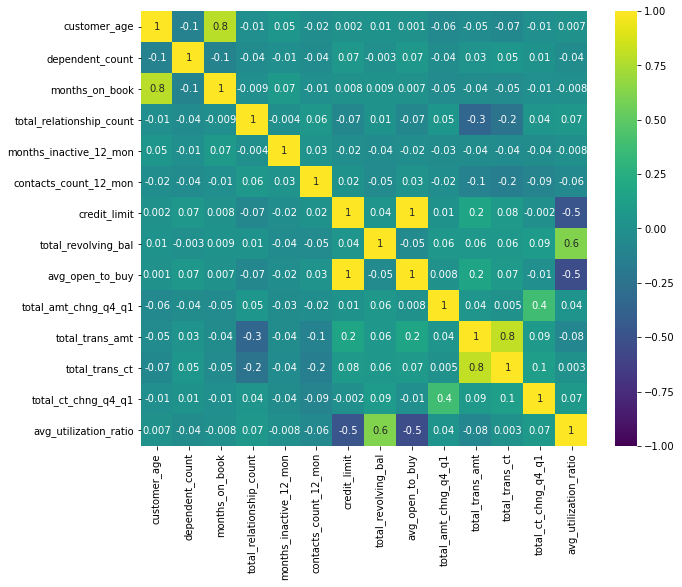

In [56]:
plt.figure(figsize=(10,8))
sns.heatmap(df.loc[:,num_columns].corr(),vmin = -1, annot=True, cmap='viridis', fmt='.1g')
plt.show()

**Some Results of Numeric Columns**
* It is seen in the heatmap that there is high multicollinearity between the features credit limit and avg_open_to_buy. Therefore avg_open_to_buy column will be dropped. 
* Also there is a high correlation between the features total_trans_ct and total_trans_amt.This is an expected result.
* Besides, there is a high correlation between age and months_on_book which means as the age increases, the duration of the relationship with the bank also increases.

In [57]:
df.drop('avg_open_to_buy', axis=1, inplace=True)

In [58]:
con_columns = ['customer_age', 'months_on_book', 'credit_limit', 'total_revolving_bal', 'total_amt_chng_q4_q1', 'total_trans_amt',
       'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio']

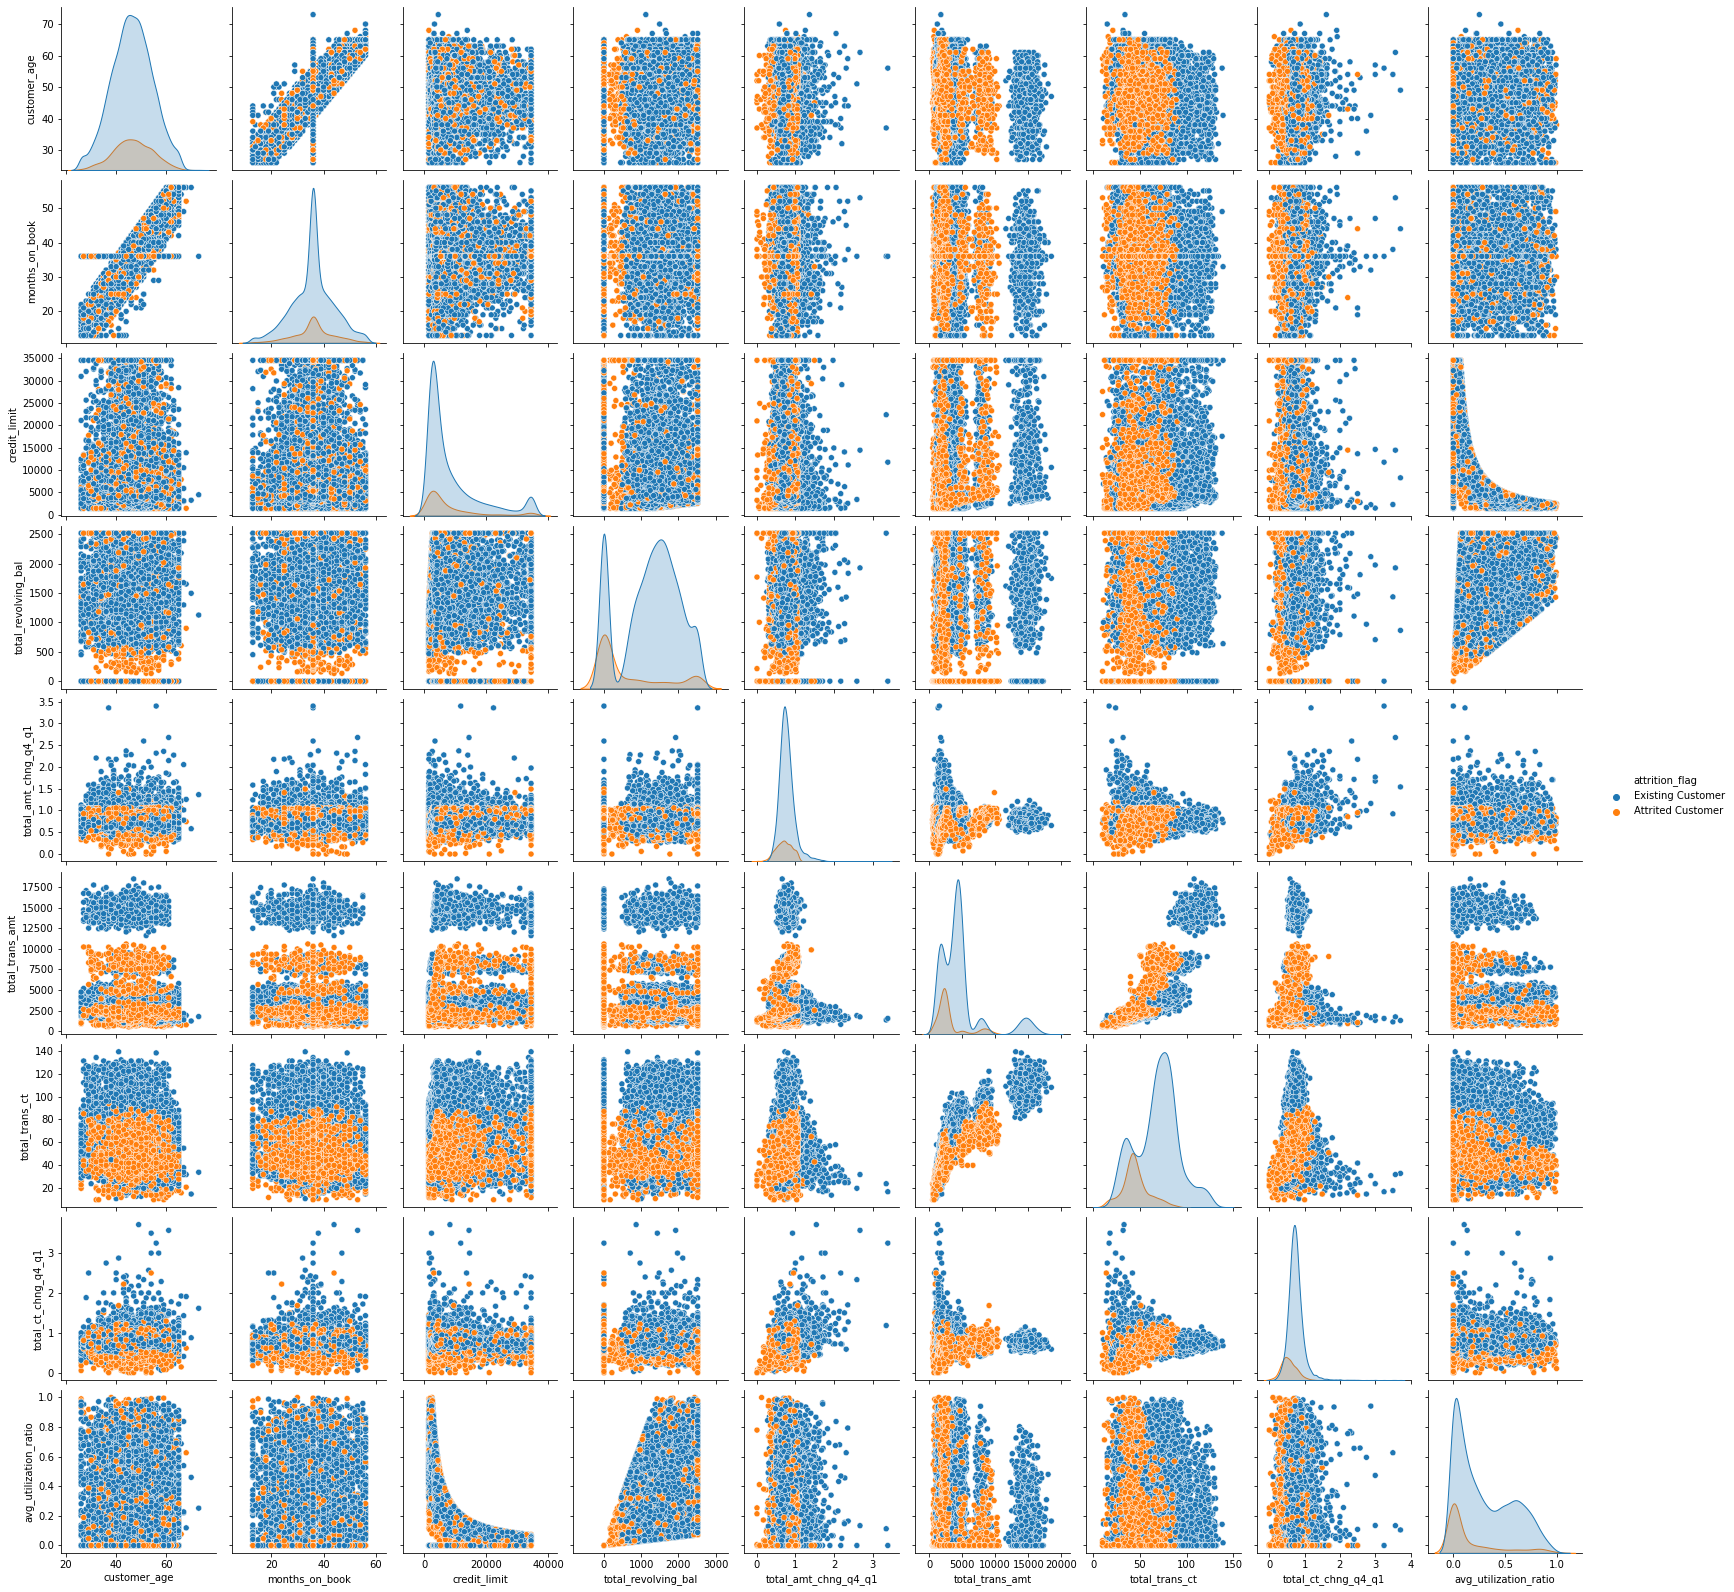

In [59]:
data = df[con_columns].join(df['attrition_flag'])
sns.pairplot(data=data, hue='attrition_flag');

**Churn Analysis of Numeric Columns**

In the pairplot, in total_trans_ct and total_trans_amt scatter plot charts, the attrited_customer groups are more clear than other scatter charts. This columns are more influential on target column. While the average total transaction amount of attrited customers is 3095, existing customers is 4654. While the average total transaction count of attrited customers is 44.93, existing customers is 68.67. 
Also, total_revolving_bal is an effect on target column. While the average total revolving balance of attrited customers is 672.8, existing customers is 1256.6. 

In [60]:
df.groupby("attrition_flag")[con_columns].mean().T

attrition_flag         Attrited Customer  Existing Customer
customer_age                      46.659             46.262
months_on_book                    36.178             35.881
credit_limit                    8136.039           8726.878
total_revolving_bal              672.823           1256.604
total_amt_chng_q4_q1               0.694              0.773
total_trans_amt                 3095.026           4654.656
total_trans_ct                    44.934             68.673
total_ct_chng_q4_q1                0.554              0.742
avg_utilization_ratio              0.162              0.296

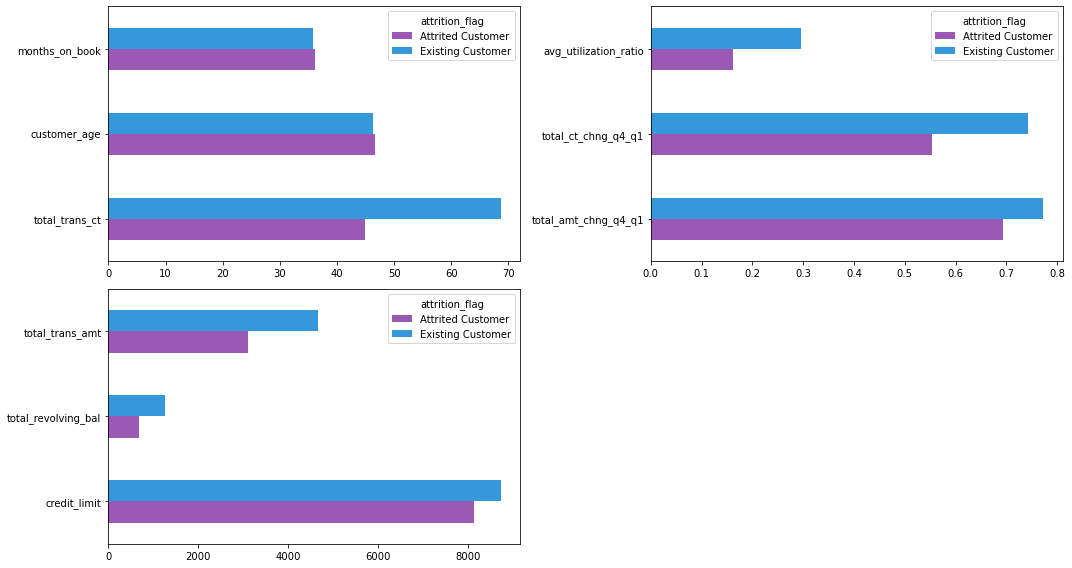

In [61]:
fig, axs = plt.subplots(2, 2, figsize=(15,8)) 
ax = axs.flatten()
df.groupby("attrition_flag")[['total_trans_ct','customer_age',
                              'months_on_book']].mean().T.plot.barh(color=["#9b59b6", "#3498db"], ax=ax[0])

df.groupby("attrition_flag")[['total_amt_chng_q4_q1','total_ct_chng_q4_q1','avg_utilization_ratio']]\
        .mean().T.plot.barh(color=["#9b59b6", "#3498db"], ax=ax[1])

df.groupby("attrition_flag")[["credit_limit","total_revolving_bal",
                              "total_trans_amt"]].mean().T.plot.barh(color=["#9b59b6", "#3498db"], ax=ax[2])
ax[-1].set_visible(False)
plt.tight_layout()

In [62]:
df["target"] = df['attrition_flag'].replace(['Existing Customer', 'Attrited Customer'],[0,1])

In [63]:
df.drop('attrition_flag',axis=1,inplace=True)

Target column got dummies and attrition_flag was dropped

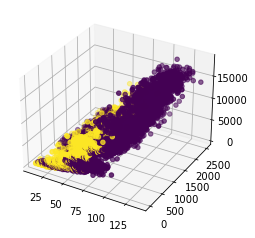

In [64]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['total_trans_ct'], df['total_revolving_bal'], df['total_trans_amt'],c=df["target"]);

## 4. Data Preprocessing

## Data Transform

In [65]:
df_dummy=pd.get_dummies(df,drop_first=True)
df_dummy.head(2).T

0        1
customer_age                      45.000   49.000
dependent_count                    3.000    5.000
months_on_book                    39.000   44.000
total_relationship_count           5.000    6.000
months_inactive_12_mon             1.000    1.000
contacts_count_12_mon              3.000    2.000
credit_limit                   12691.000 8256.000
total_revolving_bal              777.000  864.000
total_amt_chng_q4_q1               1.335    1.541
total_trans_amt                 1144.000 1291.000
total_trans_ct                    42.000   33.000
total_ct_chng_q4_q1                1.625    3.714
avg_utilization_ratio              0.061    0.105
target                             0.000    0.000
gender_M                           1.000    0.000
education_level_Doctorate          0.000    0.000
education_level_Graduate           0.000    1.000
education_level_High School        1.000    0.000
education_level_Post-Graduate      0.000    0.000
education_level_Uneducated         0.000    0.000
education_level_Unknown            0.000    0.000
marital_status_Married             1.000    0.000
marital_status_Single              0.000    1.000
marital_status_Unknown             0.000    0.000
income_category_$40K - $60K        0.000    0.000
income_category_$60K - $80K        1.000    0.000
income_category_$80K - $120K       0.000    0.000
income_category_Less than $40K     0.000    1.000
card_category_Gold                 0.000    0.000
card_category_Platinum             0.000    0.000
card_category_Silver               0.000    0.000

In [66]:
df_ord = df.copy()

In [67]:
enc = OrdinalEncoder()
df_ord[cat_columns] = enc.fit_transform(df_ord[cat_columns])
df_ord.head(2).T

0        1
customer_age                45.000   49.000
gender                       1.000    0.000
dependent_count              3.000    5.000
education_level              3.000    2.000
marital_status               1.000    2.000
income_category              2.000    4.000
card_category                0.000    0.000
months_on_book              39.000   44.000
total_relationship_count     5.000    6.000
months_inactive_12_mon       1.000    1.000
contacts_count_12_mon        3.000    2.000
credit_limit             12691.000 8256.000
total_revolving_bal        777.000  864.000
total_amt_chng_q4_q1         1.335    1.541
total_trans_amt           1144.000 1291.000
total_trans_ct              42.000   33.000
total_ct_chng_q4_q1          1.625    3.714
avg_utilization_ratio        0.061    0.105
target                       0.000    0.000

Two copies of dataframe created. One of them is dummy dataframe. In the other copy categoric columns converted to ordinal values. Ordinal dataframe will be used for tree-based models.

## Data Split

* In this step data was divided to X(Features) and y(Target) then,
* To train and evaluation purposes train and test sets were created.
* Two train and test sets created, one for dummy, one for ordinal data.

In [68]:
X=df_dummy.drop(["target"], axis=1)
y=df_dummy["target"]

In [69]:
X2=df_ord.drop(["target"], axis=1)
y2=df_ord["target"]

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=5)

In [71]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.20, stratify=y, random_state=5)

## Data Scaling

* Since the features are not in the same scale train fitted by Standardscaler and
* train and data set transformed scaled version.
* Since it is not need to scale tree-models, X_train2 was not scaled.

In [72]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 5. Modelling

* For every model first the model will be fitted with train dataset
* For every model first vanilla(base) model will be applied, and then 
* GridseachCV (hyperparemeter tuning) will be applied.
* Predict values will be obtained
* Test scores will be evaluated.
* Test scores will be compared and best model will be chosen.

### Measure Functions

In [73]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print("--------------------------------------")
    print("Confusion_matrix: ")
    print(confusion_matrix(y_test, y_pred))
    print("classification_report")
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print("--------------------------------------")
    print("Confusion_matrix:")
    print(confusion_matrix(y_train, y_train_pred))
    print("classification_report")
    print(classification_report(y_train, y_train_pred))
    fig, axes = plt.subplots(nrows=1, ncols=2)
    ax = axes.flatten()
    plot_confusion_matrix(model, X_test, y_test, ax=ax[0])
    ax[0].title.set_text("Test Confusion Matrix")
    plot_confusion_matrix(model, X_train, y_train, ax=ax[1])
    ax[1].title.set_text("Train Confusion Matrix");

In [74]:
def metric_df(model, X_train, y_train, X_test, y_test,name):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    scores = {name: {"accurancy" : accuracy_score(y_test,y_pred),
    "precision" : precision_score(y_test, y_pred),
    "recall" : recall_score(y_test, y_pred),                          
    "f1" : f1_score(y_test,y_pred),
     "True Negative Rate": confusion_matrix(y_test,y_pred)[0][0]/confusion_matrix(y_test,y_pred).sum(),
     "False Positive Rate": confusion_matrix(y_test,y_pred)[0][1]/confusion_matrix(y_test,y_pred).sum(),
    "False Negative Rate": confusion_matrix(y_test,y_pred)[1][0]/confusion_matrix(y_test,y_pred).sum(),
    "True Positive Rate": confusion_matrix(y_test,y_pred)[1][1]/confusion_matrix(y_test,y_pred).sum()}}
    return pd.DataFrame(scores)

## 5.1 Logistic Regression

### Vanilla Model Log

In [75]:
log_model=LogisticRegression(class_weight= ["balanced"] )

In [76]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight=['balanced'])

Test_Set
--------------------------------------
Confusion_matrix: 
[[1624   77]
 [ 131  194]]
classification_report
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1701
           1       0.72      0.60      0.65       325

    accuracy                           0.90      2026
   macro avg       0.82      0.78      0.80      2026
weighted avg       0.89      0.90      0.89      2026


Train_Set
--------------------------------------
Confusion_matrix:
[[6576  223]
 [ 528  774]]
classification_report
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6799
           1       0.78      0.59      0.67      1302

    accuracy                           0.91      8101
   macro avg       0.85      0.78      0.81      8101
weighted avg       0.90      0.91      0.90      8101



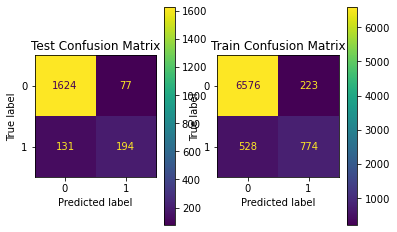

In [77]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

### GridSearchCV Log

In [78]:
model_lg = LogisticRegression()
penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)
class_weight= ["balanced", None] 
solver = ["lbfgs", "liblinear", "sag", "saga"]

param_grid = {"penalty" : penalty,
              "C" : C,
              "class_weight":class_weight,
              "solver":solver}

log_grid_model = GridSearchCV(estimator=model_lg,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "accuracy",  
                          n_jobs = -1)

In [79]:
log_grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='accuracy')

In [80]:
log_grid_model.best_params_

{'C': 0.42813323987193935,
 'class_weight': None,
 'penalty': 'l2',
 'solver': 'liblinear'}

Test_Set
--------------------------------------
Confusion_matrix: 
[[1624   77]
 [ 133  192]]
classification_report
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1701
           1       0.71      0.59      0.65       325

    accuracy                           0.90      2026
   macro avg       0.82      0.77      0.79      2026
weighted avg       0.89      0.90      0.89      2026


Train_Set
--------------------------------------
Confusion_matrix:
[[6575  224]
 [ 528  774]]
classification_report
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6799
           1       0.78      0.59      0.67      1302

    accuracy                           0.91      8101
   macro avg       0.85      0.78      0.81      8101
weighted avg       0.90      0.91      0.90      8101



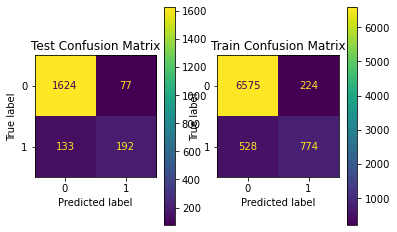

In [81]:
eval_metric(log_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

In [82]:
log = metric_df(log_grid_model, X_train_scaled, y_train, X_test_scaled, y_test, 'LOG')
log

LOG
False Negative Rate 0.066
False Positive Rate 0.038
True Negative Rate  0.802
True Positive Rate  0.095
accurancy           0.896
f1                  0.646
precision           0.714
recall              0.591

## 5.2 KNN

### Vanilla Model KNN

In [83]:
test_error_rates = []

for k in range(1,20,2):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    
    test_error_rates.append(test_error)

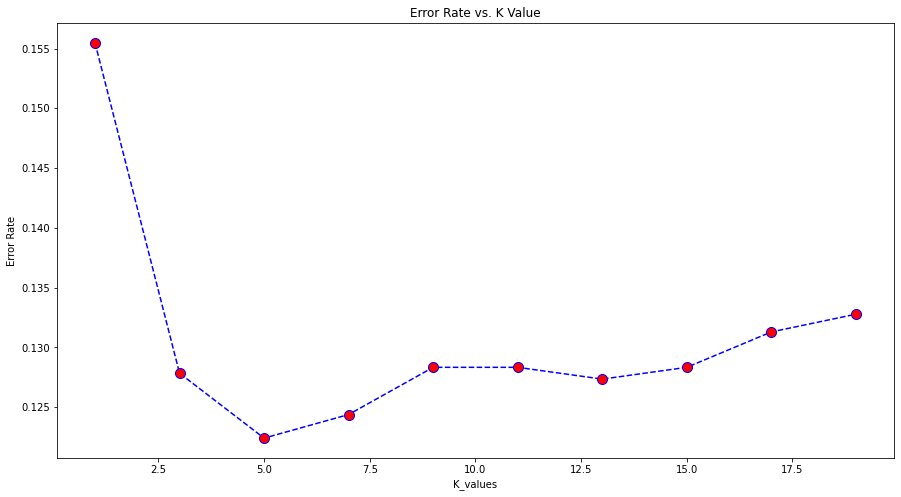

In [84]:
plt.figure(figsize=(15,8))
plt.plot(range(1,20,2), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.show()

**It is seen that best K value is 5.**

WITH K=5

Test_Set
--------------------------------------
Confusion_matrix: 
[[1659   42]
 [ 206  119]]
classification_report
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1701
           1       0.74      0.37      0.49       325

    accuracy                           0.88      2026
   macro avg       0.81      0.67      0.71      2026
weighted avg       0.87      0.88      0.86      2026


Train_Set
--------------------------------------
Confusion_matrix:
[[6729   70]
 [ 640  662]]
classification_report
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      6799
           1       0.90      0.51      0.65      1302

    accuracy                           0.91      8101
   macro avg       0.91      0.75      0.80      8101
weighted avg       0.91      0.91      0.90      8101



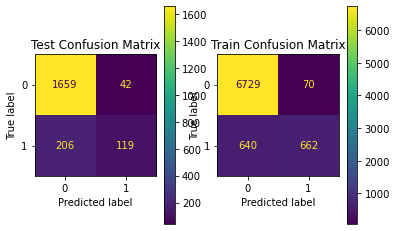

In [85]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_scaled,y_train)
print('WITH K=5\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

In [86]:
knn5 = KNeighborsClassifier(n_neighbors=5)

scores = cross_validate(knn5, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_knn_scores = pd.DataFrame(scores, index = range(1, 11))
df_knn_scores

fit_time  score_time  test_accuracy  test_precision  test_recall  test_f1
1      0.006       0.287          0.871           0.741        0.305    0.432
2      0.005       0.247          0.872           0.732        0.315    0.441
3      0.003       0.232          0.883           0.807        0.354    0.492
4      0.004       0.226          0.885           0.814        0.369    0.508
5      0.003       0.245          0.881           0.758        0.385    0.510
6      0.004       0.285          0.888           0.810        0.392    0.528
7      0.003       0.247          0.872           0.703        0.346    0.464
8      0.004       0.248          0.881           0.736        0.408    0.525
9      0.003       0.233          0.884           0.781        0.385    0.515
10     0.003       0.254          0.870           0.741        0.305    0.432

In [87]:
df_knn_scores.mean()[2:]

test_accuracy    0.879
test_precision   0.762
test_recall      0.356
test_f1          0.485
dtype: float64

### GridSearchCV KNN

In [88]:
knn_grid = KNeighborsClassifier()

k_values= range(1,20,2)

param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}

knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'accuracy')

knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20, 2), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [89]:
knn_grid_model.best_params_

{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}

WITH K=7

Test_Set
--------------------------------------
Confusion_matrix: 
[[1665   36]
 [ 185  140]]
classification_report
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1701
           1       0.80      0.43      0.56       325

    accuracy                           0.89      2026
   macro avg       0.85      0.70      0.75      2026
weighted avg       0.88      0.89      0.88      2026


Train_Set
--------------------------------------
Confusion_matrix:
[[6799    0]
 [   0 1302]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6799
           1       1.00      1.00      1.00      1302

    accuracy                           1.00      8101
   macro avg       1.00      1.00      1.00      8101
weighted avg       1.00      1.00      1.00      8101



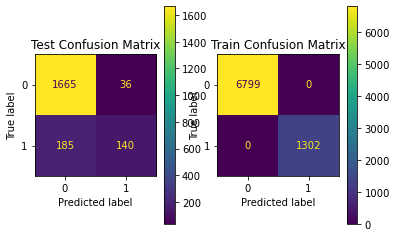

In [90]:
print('WITH K=7\n')
eval_metric(knn_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

**KNN GridSeachCV: Best k parameter was found as k=7. But with this parameter model overfitted. While accurancy of train data is 1.0, accurancy of test data set is 0.89. Therefore k is chosen as 5 in this model.**

In [91]:
knn_df = metric_df(knn, X_train_scaled, y_train, X_test_scaled, y_test, 'KNN')
knn_df

KNN
False Negative Rate 0.102
False Positive Rate 0.021
True Negative Rate  0.819
True Positive Rate  0.059
accurancy           0.878
f1                  0.490
precision           0.739
recall              0.366

## 5.3 SVM

### Vanilla Model SVC

In [92]:
svm_model = SVC(random_state=5)
svm_model.fit(X_train_scaled, y_train)

SVC(random_state=5)

Test_Set
--------------------------------------
Confusion_matrix: 
[[1655   46]
 [ 121  204]]
classification_report
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1701
           1       0.82      0.63      0.71       325

    accuracy                           0.92      2026
   macro avg       0.87      0.80      0.83      2026
weighted avg       0.91      0.92      0.91      2026


Train_Set
--------------------------------------
Confusion_matrix:
[[6715   84]
 [ 364  938]]
classification_report
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      6799
           1       0.92      0.72      0.81      1302

    accuracy                           0.94      8101
   macro avg       0.93      0.85      0.89      8101
weighted avg       0.94      0.94      0.94      8101



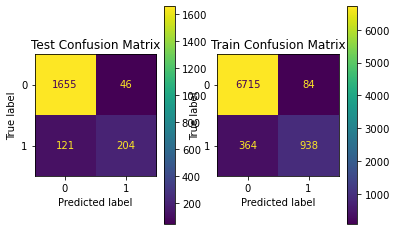

In [93]:
eval_metric(svm_model, X_train_scaled, y_train, X_test_scaled, y_test)

In [94]:
svm_model2 = SVC(random_state=5)
scores = cross_validate(svm_model2, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy    0.839
test_precision   0.000
test_recall      0.000
test_f1          0.000
dtype: float64

### GridSearchCV SVM

In [95]:
param_grid = {'C': [0.02, 0.04, 0.06],
              'gamma': [0.02, 0.04],
              'kernel': ['rbf','linear']}

svm_model = SVC(random_state=5)

svm_model_grid = GridSearchCV(svm_model, param_grid, cv=10, n_jobs=-1)

svm_model_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=SVC(random_state=5), n_jobs=-1,
             param_grid={'C': [0.02, 0.04, 0.06], 'gamma': [0.02, 0.04],
                         'kernel': ['rbf', 'linear']})

In [96]:
svm_model_grid.best_params_

{'C': 0.04, 'gamma': 0.02, 'kernel': 'linear'}

Test_Set
--------------------------------------
Confusion_matrix: 
[[1633   68]
 [ 143  182]]
classification_report
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1701
           1       0.73      0.56      0.63       325

    accuracy                           0.90      2026
   macro avg       0.82      0.76      0.79      2026
weighted avg       0.89      0.90      0.89      2026


Train_Set
--------------------------------------
Confusion_matrix:
[[6626  173]
 [ 557  745]]
classification_report
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      6799
           1       0.81      0.57      0.67      1302

    accuracy                           0.91      8101
   macro avg       0.87      0.77      0.81      8101
weighted avg       0.90      0.91      0.90      8101



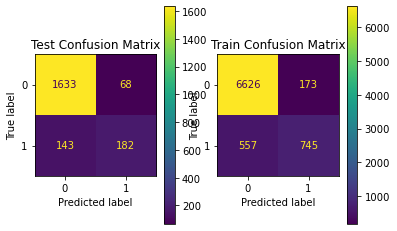

In [97]:
eval_metric(svm_model_grid, X_train_scaled, y_train, X_test_scaled, y_test)

In [98]:
svm_df = metric_df(svm_model_grid, X_train_scaled, y_train, X_test_scaled, y_test, 'SVM')
svm_df

SVM
False Negative Rate 0.071
False Positive Rate 0.034
True Negative Rate  0.806
True Positive Rate  0.090
accurancy           0.896
f1                  0.633
precision           0.728
recall              0.560

## 5.4 Decision Tree

### Vanilla Model DT

In [111]:
model_tree = DecisionTreeClassifier()

model_tree.fit(X_train2, y_train2)

DecisionTreeClassifier()

Test_Set
--------------------------------------
Confusion_matrix: 
[[1627   74]
 [  68  257]]
classification_report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1701
           1       0.78      0.79      0.78       325

    accuracy                           0.93      2026
   macro avg       0.87      0.87      0.87      2026
weighted avg       0.93      0.93      0.93      2026


Train_Set
--------------------------------------
Confusion_matrix:
[[6799    0]
 [   0 1302]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6799
           1       1.00      1.00      1.00      1302

    accuracy                           1.00      8101
   macro avg       1.00      1.00      1.00      8101
weighted avg       1.00      1.00      1.00      8101



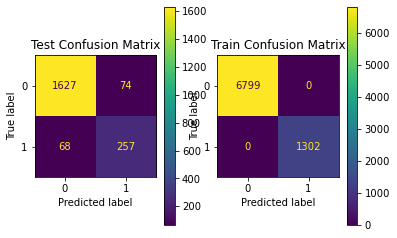

In [100]:
eval_metric(model_tree, X_train2, y_train2, X_test2, y_test2)

### GridSearchCV DT

In [101]:
model_t = DecisionTreeClassifier(random_state=5)

param_grid = {"splitter":["best", "random"],
              "max_features":[13,15,17],
              "max_depth": [8,10,12],
              "min_samples_leaf": [1, 2],
              "min_samples_split": [7,8,9]}
             

model_grid_tree = GridSearchCV(estimator=model_t,
                          param_grid=param_grid,
                          scoring='f1_micro',
                          cv=10,
                          n_jobs = -1)
model_grid_tree.fit(X_train2, y_train2)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=5), n_jobs=-1,
             param_grid={'max_depth': [8, 10, 12], 'max_features': [13, 15, 17],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [7, 8, 9],
                         'splitter': ['best', 'random']},
             scoring='f1_micro')

In [102]:
model_grid_tree.best_params_

{'max_depth': 10,
 'max_features': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'splitter': 'best'}

Test_Set
--------------------------------------
Confusion_matrix: 
[[1645   56]
 [  69  256]]
classification_report
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1701
           1       0.82      0.79      0.80       325

    accuracy                           0.94      2026
   macro avg       0.89      0.88      0.88      2026
weighted avg       0.94      0.94      0.94      2026


Train_Set
--------------------------------------
Confusion_matrix:
[[6757   42]
 [ 103 1199]]
classification_report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      6799
           1       0.97      0.92      0.94      1302

    accuracy                           0.98      8101
   macro avg       0.98      0.96      0.97      8101
weighted avg       0.98      0.98      0.98      8101



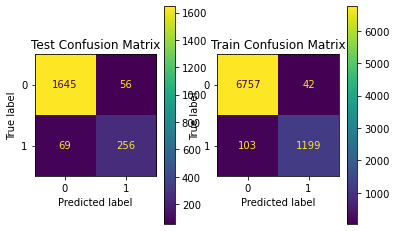

In [103]:
eval_metric(model_grid_tree, X_train2, y_train2, X_test2, y_test2)

In [104]:
dt_df = metric_df(model_grid_tree, X_train2, y_train2, X_test2, y_test2, 'DT')
dt_df

DT
False Negative Rate 0.034
False Positive Rate 0.028
True Negative Rate  0.812
True Positive Rate  0.126
accurancy           0.938
f1                  0.804
precision           0.821
recall              0.788

## 5.5. Random Forest

### Vanilla Model RF

In [105]:
rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train2, y_train2)

RandomForestClassifier()

Test_Set
--------------------------------------
Confusion_matrix: 
[[1670   31]
 [  53  272]]
classification_report
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1701
           1       0.90      0.84      0.87       325

    accuracy                           0.96      2026
   macro avg       0.93      0.91      0.92      2026
weighted avg       0.96      0.96      0.96      2026


Train_Set
--------------------------------------
Confusion_matrix:
[[6799    0]
 [   0 1302]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6799
           1       1.00      1.00      1.00      1302

    accuracy                           1.00      8101
   macro avg       1.00      1.00      1.00      8101
weighted avg       1.00      1.00      1.00      8101



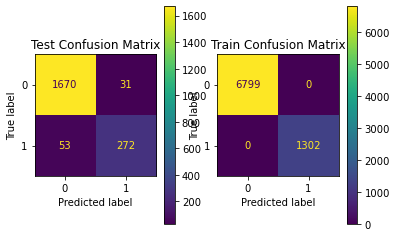

In [106]:
eval_metric(rfc, X_train2, y_train2, X_test2, y_test2)

### GridSearchCV RF

In [107]:
param_grid = {'n_estimators':[300,350],
             'criterion': ["gini","entropy"],
             'max_depth':[10,11,13],
             'min_samples_split':[2,3],
             }

rfc_model = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc_model,
                             param_grid,
                             verbose=2,
                             scoring="accuracy",
                             n_jobs=-1)

rfc_grid.fit(X_train2,y_train2)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 11, 13], 'min_samples_split': [2, 3],
                         'n_estimators': [300, 350]},
             scoring='accuracy', verbose=2)

In [108]:
rfc_grid.best_params_

{'criterion': 'gini',
 'max_depth': 13,
 'min_samples_split': 2,
 'n_estimators': 350}

Test_Set
--------------------------------------
Confusion_matrix: 
[[1671   30]
 [  49  276]]
classification_report
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1701
           1       0.90      0.85      0.87       325

    accuracy                           0.96      2026
   macro avg       0.94      0.92      0.93      2026
weighted avg       0.96      0.96      0.96      2026


Train_Set
--------------------------------------
Confusion_matrix:
[[6799    0]
 [  23 1279]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6799
           1       1.00      0.98      0.99      1302

    accuracy                           1.00      8101
   macro avg       1.00      0.99      0.99      8101
weighted avg       1.00      1.00      1.00      8101



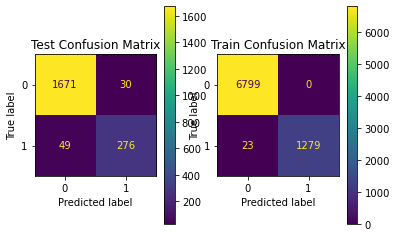

In [109]:
eval_metric(rfc_grid, X_train2, y_train2, X_test2, y_test2)

In [110]:
rfc_df = metric_df(rfc_grid, X_train2, y_train2, X_test2, y_test2, 'RF')
rfc_df

RF
False Negative Rate 0.024
False Positive Rate 0.015
True Negative Rate  0.825
True Positive Rate  0.136
accurancy           0.961
f1                  0.875
precision           0.902
recall              0.849

There is a overfitting in the model. Some hyperparameters were tuned in order to handle overfitting. Model is also close to overfitting but there are some false predictions in the train data set. 

## 5.6. XGBoost

### Vanilla XG

In [112]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train2, y_train2)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

Test_Set
--------------------------------------
Confusion_matrix: 
[[1679   22]
 [  36  289]]
classification_report
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1701
           1       0.93      0.89      0.91       325

    accuracy                           0.97      2026
   macro avg       0.95      0.94      0.95      2026
weighted avg       0.97      0.97      0.97      2026


Train_Set
--------------------------------------
Confusion_matrix:
[[6799    0]
 [   0 1302]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6799
           1       1.00      1.00      1.00      1302

    accuracy                           1.00      8101
   macro avg       1.00      1.00      1.00      8101
weighted avg       1.00      1.00      1.00      8101



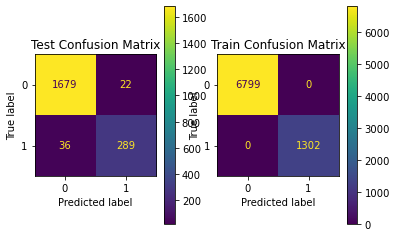

In [113]:
eval_metric(xgb_classifier, X_train2, y_train2, X_test2, y_test2)

### GridSearchCV XG

In [114]:
param_grid = {"n_estimators":[400,500],'max_depth':[2,3,4], "learning_rate": [0.17,0.18]}
xgb_model = XGBClassifier(random_state=5)
xgb_grid = GridSearchCV(xgb_model, param_grid, scoring = "f1", verbose=2, n_jobs = -1).fit(X_train2, y_train2)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [115]:
xgb_grid.best_params_

{'learning_rate': 0.17, 'max_depth': 3, 'n_estimators': 400}

Test_Set
--------------------------------------
Confusion_matrix: 
[[1679   22]
 [  31  294]]
classification_report
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1701
           1       0.93      0.90      0.92       325

    accuracy                           0.97      2026
   macro avg       0.96      0.95      0.95      2026
weighted avg       0.97      0.97      0.97      2026


Train_Set
--------------------------------------
Confusion_matrix:
[[6792    7]
 [   7 1295]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6799
           1       0.99      0.99      0.99      1302

    accuracy                           1.00      8101
   macro avg       1.00      1.00      1.00      8101
weighted avg       1.00      1.00      1.00      8101



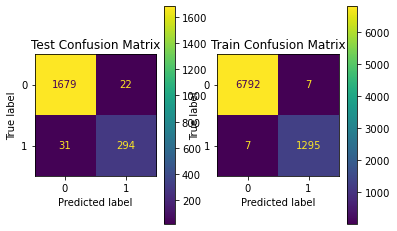

In [116]:
eval_metric(xgb_grid, X_train2, y_train2, X_test2, y_test2)

In [117]:
xg_df = metric_df(xgb_grid, X_train2, y_train2, X_test2, y_test2, 'XGB')
xg_df

XGB
False Negative Rate 0.015
False Positive Rate 0.011
True Negative Rate  0.829
True Positive Rate  0.145
accurancy           0.974
f1                  0.917
precision           0.930
recall              0.905

There is a overfitting in the model. Some hyperparameters were tuned in order to handle overfitting. Model is also close to overfitting but there are some false predictions in the train data set. 

## 5.7. AdaBoost

### Vanilla AB

In [118]:
ada_model = AdaBoostClassifier(random_state=5)
ada_model.fit(X_train2, y_train2)

AdaBoostClassifier(random_state=5)

Test_Set
--------------------------------------
Confusion_matrix: 
[[1655   46]
 [  53  272]]
classification_report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1701
           1       0.86      0.84      0.85       325

    accuracy                           0.95      2026
   macro avg       0.91      0.90      0.91      2026
weighted avg       0.95      0.95      0.95      2026


Train_Set
--------------------------------------
Confusion_matrix:
[[6675  124]
 [ 183 1119]]
classification_report
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      6799
           1       0.90      0.86      0.88      1302

    accuracy                           0.96      8101
   macro avg       0.94      0.92      0.93      8101
weighted avg       0.96      0.96      0.96      8101



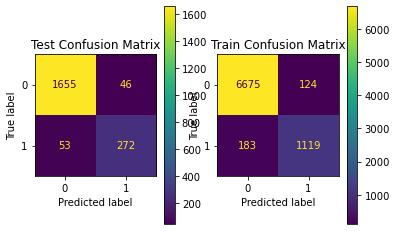

In [119]:
eval_metric(ada_model, X_train2, y_train2, X_test2, y_test2)

### GridSearchCV AB

In [120]:
model_a = AdaBoostClassifier(random_state=5)

param_grid = {"n_estimators": [200,300], "learning_rate": [0.7, 0.8,0.9]}

ada_grid_model = GridSearchCV(model_a, param_grid, cv=5, scoring= 'f1',n_jobs = -1)

ada_grid_model.fit(X_train2, y_train2)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=5), n_jobs=-1,
             param_grid={'learning_rate': [0.7, 0.8, 0.9],
                         'n_estimators': [200, 300]},
             scoring='f1')

In [121]:
ada_grid_model.best_params_

{'learning_rate': 0.8, 'n_estimators': 200}

Test_Set
--------------------------------------
Confusion_matrix: 
[[1653   48]
 [  40  285]]
classification_report
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1701
           1       0.86      0.88      0.87       325

    accuracy                           0.96      2026
   macro avg       0.92      0.92      0.92      2026
weighted avg       0.96      0.96      0.96      2026


Train_Set
--------------------------------------
Confusion_matrix:
[[6701   98]
 [ 138 1164]]
classification_report
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      6799
           1       0.92      0.89      0.91      1302

    accuracy                           0.97      8101
   macro avg       0.95      0.94      0.95      8101
weighted avg       0.97      0.97      0.97      8101



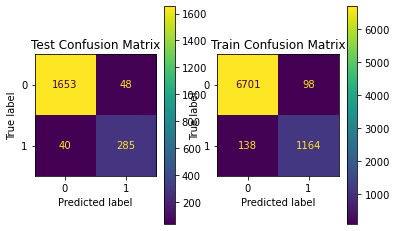

In [122]:
eval_metric(ada_grid_model, X_train2, y_train2, X_test2, y_test2)

In [123]:
ada_df = metric_df(ada_grid_model, X_train2, y_train2, X_test2, y_test2, 'Ada')
ada_df

Ada
False Negative Rate 0.020
False Positive Rate 0.024
True Negative Rate  0.816
True Positive Rate  0.141
accurancy           0.957
f1                  0.866
precision           0.856
recall              0.877

## 5.8. GradientBoost

### Vanilla GB

In [124]:
grad_model = GradientBoostingClassifier(random_state=5)
grad_model.fit(X_train2, y_train2)

GradientBoostingClassifier(random_state=5)

Test_Set
--------------------------------------
Confusion_matrix: 
[[1677   24]
 [  48  277]]
classification_report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1701
           1       0.92      0.85      0.88       325

    accuracy                           0.96      2026
   macro avg       0.95      0.92      0.93      2026
weighted avg       0.96      0.96      0.96      2026


Train_Set
--------------------------------------
Confusion_matrix:
[[6751   48]
 [ 144 1158]]
classification_report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      6799
           1       0.96      0.89      0.92      1302

    accuracy                           0.98      8101
   macro avg       0.97      0.94      0.95      8101
weighted avg       0.98      0.98      0.98      8101



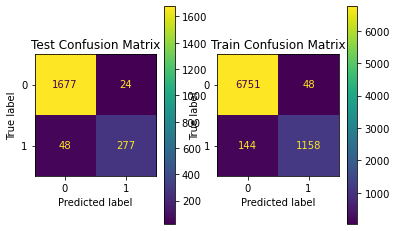

In [125]:
eval_metric(grad_model, X_train2, y_train2, X_test2, y_test2)

### GridSearchCV GB

In [126]:
model_g = GradientBoostingClassifier(random_state=5)

param_grid = {"n_estimators":[200, 300],
             "subsample":[1], "learning_rate": [0.1], 'max_depth':[2,3]}

grad_grid_model = GridSearchCV(model_g, param_grid, cv=5, scoring= 'f1',n_jobs = -1)

grad_grid_model.fit(X_train2, y_train2)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=5),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'max_depth': [2, 3],
                         'n_estimators': [200, 300], 'subsample': [1]},
             scoring='f1')

In [127]:
grad_grid_model.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1}

Test_Set
--------------------------------------
Confusion_matrix: 
[[1678   23]
 [  35  290]]
classification_report
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1701
           1       0.93      0.89      0.91       325

    accuracy                           0.97      2026
   macro avg       0.95      0.94      0.95      2026
weighted avg       0.97      0.97      0.97      2026


Train_Set
--------------------------------------
Confusion_matrix:
[[6779   20]
 [  46 1256]]
classification_report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6799
           1       0.98      0.96      0.97      1302

    accuracy                           0.99      8101
   macro avg       0.99      0.98      0.98      8101
weighted avg       0.99      0.99      0.99      8101



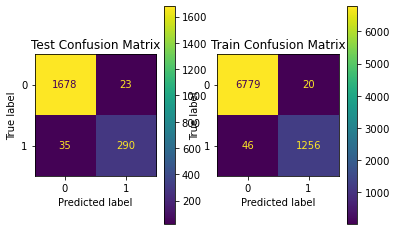

In [128]:
eval_metric(grad_grid_model, X_train2, y_train2, X_test2, y_test2)

In [129]:
grad_df = metric_df(grad_grid_model, X_train2, y_train2, X_test2, y_test2, 'Grad')
grad_df

Grad
False Negative Rate 0.017
False Positive Rate 0.011
True Negative Rate  0.828
True Positive Rate  0.143
accurancy           0.971
f1                  0.909
precision           0.927
recall              0.892

There is a overfitting in the model. Some hyperparameters were tuned in order to handle overfitting. Model is also close to overfitting but there are some false predictions in the train data set. 

## 5.9. LightGBM

### Vanilla LG

In [130]:
lg_model = lgb.LGBMClassifier(random_state=5)
lg_model.fit(X_train2,y_train2)

LGBMClassifier(random_state=5)

Test_Set
--------------------------------------
Confusion_matrix: 
[[1675   26]
 [  30  295]]
classification_report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1701
           1       0.92      0.91      0.91       325

    accuracy                           0.97      2026
   macro avg       0.95      0.95      0.95      2026
weighted avg       0.97      0.97      0.97      2026


Train_Set
--------------------------------------
Confusion_matrix:
[[6798    1]
 [   0 1302]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6799
           1       1.00      1.00      1.00      1302

    accuracy                           1.00      8101
   macro avg       1.00      1.00      1.00      8101
weighted avg       1.00      1.00      1.00      8101



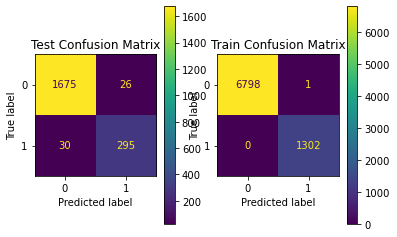

In [131]:
eval_metric(lg_model, X_train2, y_train2, X_test2, y_test2)

### GridSearchCV LG

In [132]:
model_lg = lgb.LGBMClassifier(boosting_type='gbdt',  
                                              objective='binary',  
                                              metric='f1'
                                              )

param_grid = {
     'learning_rate': [0.03,0.07],
    'num_leaves': [20,25],
    'lambda_l1': [0, 1],
    'lambda_l2': [0, 1]
    }

lgb_grid_model = GridSearchCV(model_lg, param_grid, n_jobs = -1)


lgb_grid_model.fit(X_train2, y_train2)

[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0


GridSearchCV(estimator=LGBMClassifier(metric='f1', objective='binary'),
             n_jobs=-1,
             param_grid={'lambda_l1': [0, 1], 'lambda_l2': [0, 1],
                         'learning_rate': [0.03, 0.07],
                         'num_leaves': [20, 25]})

In [133]:
lgb_grid_model.best_params_

{'lambda_l1': 0, 'lambda_l2': 0, 'learning_rate': 0.07, 'num_leaves': 20}

Test_Set
--------------------------------------
Confusion_matrix: 
[[1677   24]
 [  36  289]]
classification_report
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1701
           1       0.92      0.89      0.91       325

    accuracy                           0.97      2026
   macro avg       0.95      0.94      0.94      2026
weighted avg       0.97      0.97      0.97      2026


Train_Set
--------------------------------------
Confusion_matrix:
[[6769   30]
 [  51 1251]]
classification_report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6799
           1       0.98      0.96      0.97      1302

    accuracy                           0.99      8101
   macro avg       0.98      0.98      0.98      8101
weighted avg       0.99      0.99      0.99      8101



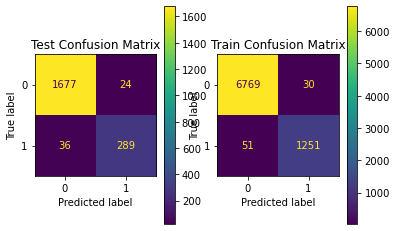

In [134]:
eval_metric(lgb_grid_model, X_train2, y_train2, X_test2, y_test2)

In [135]:
lg_df = metric_df(lgb_grid_model, X_train2, y_train2, X_test2, y_test2, 'LG')
lg_df

LG
False Negative Rate 0.018
False Positive Rate 0.012
True Negative Rate  0.828
True Positive Rate  0.143
accurancy           0.970
f1                  0.906
precision           0.923
recall              0.889

There is a overfitting in the model. Some hyperparameters were tuned in order to handle overfitting. Model is also close to overfitting but there are some false predictions in the train data set. 

## 6. Accurancy Comparison

In [136]:
df_result = pd.concat([log,knn_df,svm_df,dt_df,rfc_df,xg_df,ada_df,grad_df,lg_df], axis=1)
df_result.sort_values(by="accurancy", axis=1, ascending=False).T

False Negative Rate  False Positive Rate  True Negative Rate  \
XGB                 0.015                0.011               0.829   
Grad                0.017                0.011               0.828   
LG                  0.018                0.012               0.828   
RF                  0.024                0.015               0.825   
Ada                 0.020                0.024               0.816   
DT                  0.034                0.028               0.812   
LOG                 0.066                0.038               0.802   
SVM                 0.071                0.034               0.806   
KNN                 0.102                0.021               0.819   

      True Positive Rate  accurancy    f1  precision  recall  
XGB                0.145      0.974 0.917      0.930   0.905  
Grad               0.143      0.971 0.909      0.927   0.892  
LG                 0.143      0.970 0.906      0.923   0.889  
RF                 0.136      0.961 0.875      0.902   0.849  
Ada                0.141      0.957 0.866      0.856   0.877  
DT                 0.126      0.938 0.804      0.821   0.788  
LOG                0.095      0.896 0.646      0.714   0.591  
SVM                0.090      0.896 0.633      0.728   0.560  
KNN                0.059      0.878 0.490      0.739   0.366

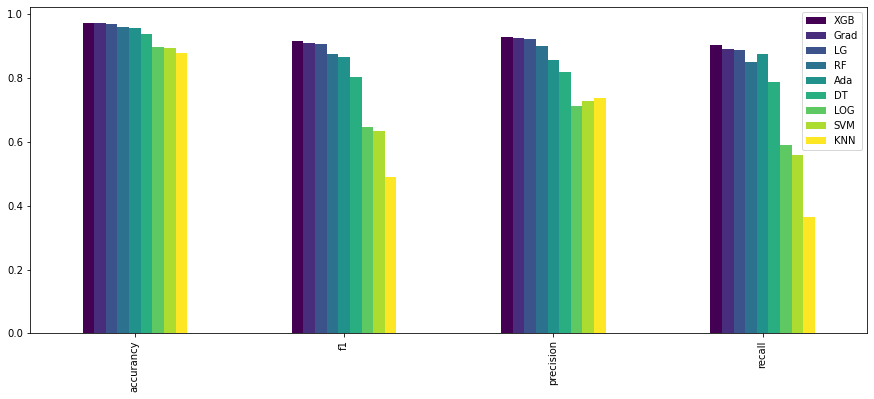

In [137]:
df_result[4:].sort_values(by="accurancy", axis=1, ascending=False).plot.bar(figsize = (15,6), cmap="viridis")
plt.legend(loc="upper right")
plt.show()

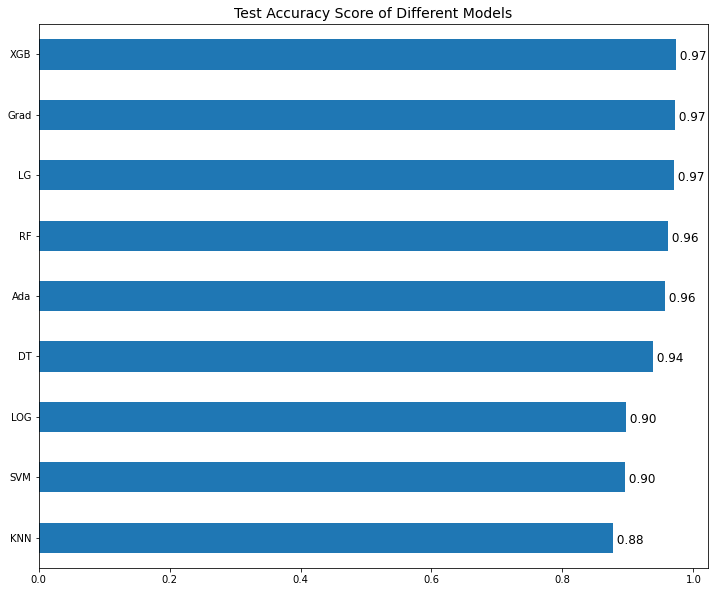

In [138]:
ax = df_result[4:5].T.sort_values(by="accurancy").plot.barh(figsize=(12,10), legend=None)
plt.title("Test Accuracy Score of Different Models", size=14)
for patch in ax.patches:
    ax.text(
        patch.get_width(), 
        patch.get_y()+0.15,
        " {:.2f}".format(patch.get_width()), 
        fontsize=12
    )

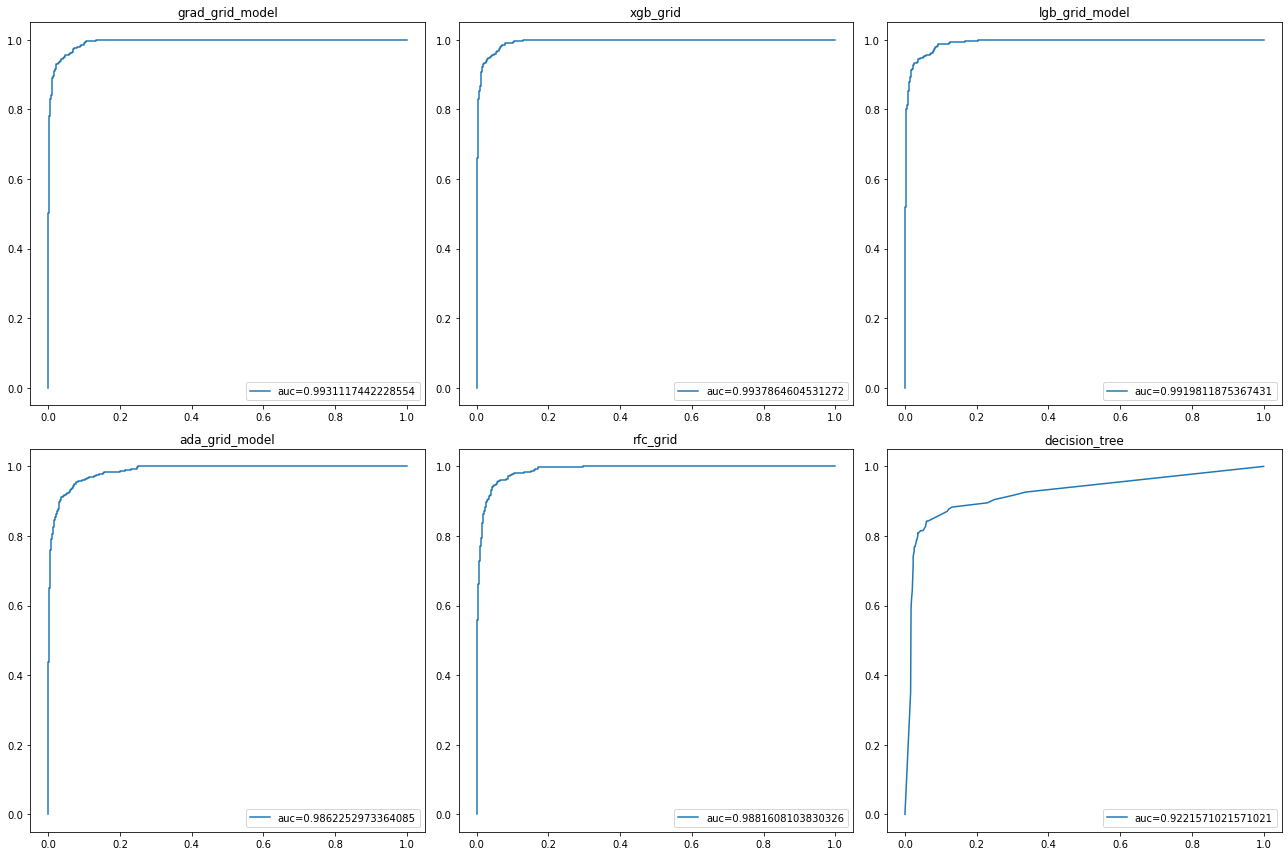

In [139]:
models = [grad_grid_model,xgb_grid,lgb_grid_model,ada_grid_model, 
          rfc_grid, model_grid_tree]
models2 = ["grad_grid_model","xgb_grid","lgb_grid_model","ada_grid_model",
           "rfc_grid", "decision_tree"]
fig, axes = plt.subplots(2,3, figsize=(18,12))
ax = axes.flatten()
i = 0
for model in models:
    proba= model.predict_proba(X_test2)[:, 1]
    fpr, tpr, _ = roc_curve(y_test2,  proba)
    auc = roc_auc_score(y_test2, proba)
    ax[i].plot(fpr,tpr,label="auc="+str(auc))
    ax[i].legend(loc=4)
    ax[i].set_title(models2[i])
    i += 1
plt.tight_layout()
   

**Three methods stand out among the methods. These methods are XGBoost, GradBoost, LightGBM. Although the scores of XGBoost is a bit higher than the other two, XGBoost is more close to overfitting. AUC score of GradBoost is also high. GradBoost can be chosen the best model. In the analysis of feature importance also, Gradboost uses less features in the model. It is also important.**

## 7.Feature Importance

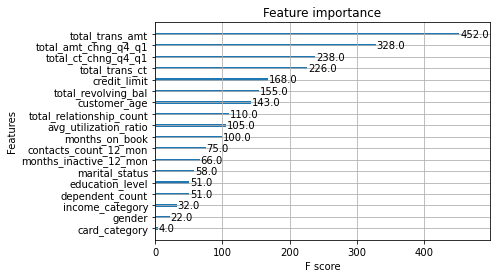

In [140]:
plot_importance(xgb_classifier);

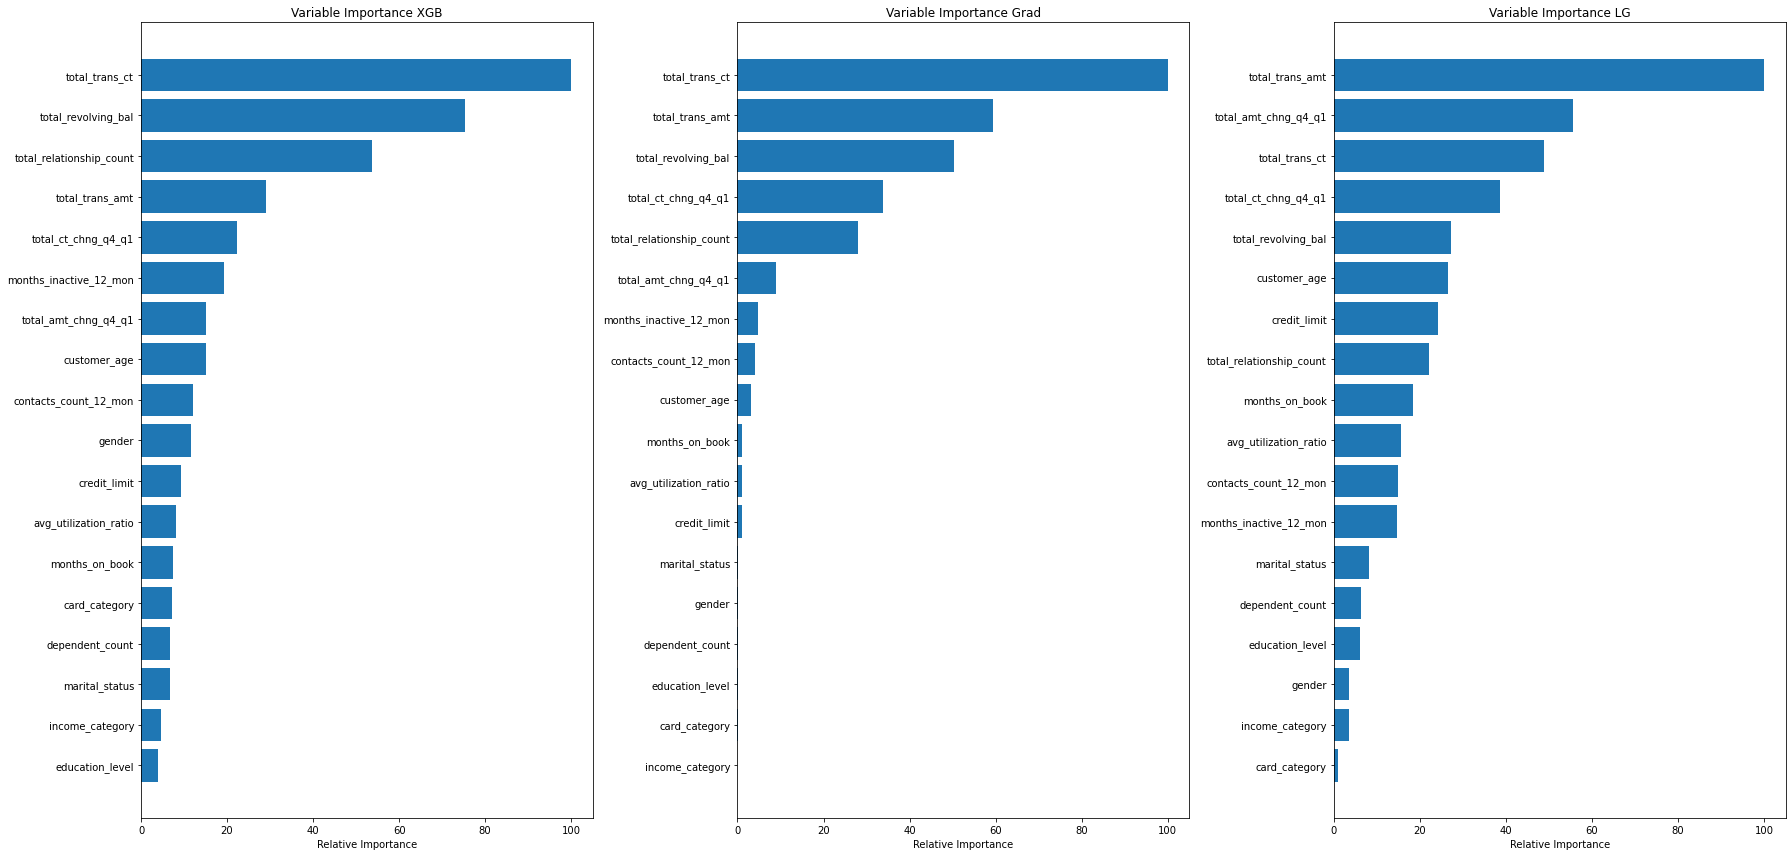

In [141]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25,12))
ax = axes.flatten()

feature_importancexg = xgb_classifier.feature_importances_
feature_importancexg = 100.0 * (feature_importancexg / feature_importancexg.max())
sorted_idx_xg = np.argsort(feature_importancexg)
posxg = np.arange(sorted_idx_xg.shape[0]) + .5
ax[0].barh(posxg, feature_importancexg[sorted_idx_xg], align='center')
ax[0].set_yticks(posxg)
ax[0].set_yticklabels(X_train2.keys()[sorted_idx_xg])
ax[0].set_xlabel('Relative Importance')
ax[0].set_title('Variable Importance XGB')

feature_importance = grad_model.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
ax[1].barh(pos, feature_importance[sorted_idx], align='center')
ax[1].set_yticks(pos)
ax[1].set_yticklabels(X_train2.keys()[sorted_idx])
ax[1].set_xlabel('Relative Importance')
ax[1].set_title('Variable Importance Grad')

feature_importancelg = lg_model.feature_importances_
feature_importancelg = 100.0 * (feature_importancelg / feature_importancelg.max())
sorted_idxlg = np.argsort(feature_importancelg)
poslg = np.arange(sorted_idxlg.shape[0]) + .5
ax[2].barh(poslg, feature_importancelg[sorted_idxlg], align='center')
ax[2].set_yticks(poslg)
ax[2].set_yticklabels(X_train2.keys()[sorted_idxlg])
ax[2].set_xlabel('Relative Importance')
ax[2].set_title('Variable Importance LG')

plt.tight_layout()


**The most important features in the model are total_trans_ct, total_trans_amt, total_revolving_bal. Also the features total_ct_chng_q4_q1, total_amt_chng_q4_q1,total_relationship_count, months_inactive_12_mon are important for the models. Customer age has a small effect on target. Categorical variables such as income, gender, educational level, marital status, card category has a very small effect on target.**
* **total_trans_ct, total_trans_amt, total_revolving_bal features of alarmed customers should be constantly checked. It can be determined alarm tresholds for these features.**
* **Special campaigns should be made for customers are more likely to churn.**

## GradientBoost with 9 features

In [142]:
X1 = df.loc[:,['customer_age', 'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'total_revolving_bal',
       'total_amt_chng_q4_q1', 'total_trans_amt', 'total_trans_ct',
       'total_ct_chng_q4_q1']]
y =df["target"]

In [143]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X1, y, test_size=0.20, stratify=y, random_state=5)

In [144]:
grad_model_9feature = GradientBoostingClassifier(random_state=5,n_estimators=300)
grad_model_9feature.fit(X_train3, y_train3)

GradientBoostingClassifier(n_estimators=300, random_state=5)

Test_Set
--------------------------------------
Confusion_matrix: 
[[1678   23]
 [  36  289]]
classification_report
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1701
           1       0.93      0.89      0.91       325

    accuracy                           0.97      2026
   macro avg       0.95      0.94      0.95      2026
weighted avg       0.97      0.97      0.97      2026


Train_Set
--------------------------------------
Confusion_matrix:
[[6767   32]
 [  60 1242]]
classification_report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6799
           1       0.97      0.95      0.96      1302

    accuracy                           0.99      8101
   macro avg       0.98      0.97      0.98      8101
weighted avg       0.99      0.99      0.99      8101



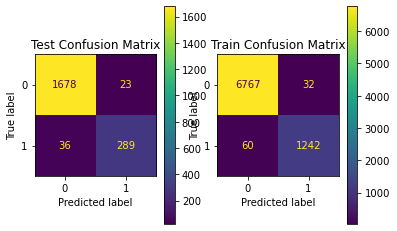

In [145]:
eval_metric(grad_model_9feature, X_train3, y_train3, X_test3, y_test3)

In [146]:
grad_9f = metric_df(grad_model_9feature, X_train3, y_train3, X_test3, y_test3, 'Grad_9feature')
grad_9f

Grad_9feature
False Negative Rate          0.018
False Positive Rate          0.011
True Negative Rate           0.828
True Positive Rate           0.143
accurancy                    0.971
f1                           0.907
precision                    0.926
recall                       0.889

In [147]:
df_result = pd.concat([log,knn_df,svm_df,dt_df,rfc_df,xg_df,ada_df,grad_df,lg_df,grad_9f], axis=1)
df_result.sort_values(by="accurancy", axis=1, ascending=False).T

False Negative Rate  False Positive Rate  True Negative Rate  \
XGB                          0.015                0.011               0.829   
Grad                         0.017                0.011               0.828   
Grad_9feature                0.018                0.011               0.828   
LG                           0.018                0.012               0.828   
RF                           0.024                0.015               0.825   
Ada                          0.020                0.024               0.816   
DT                           0.034                0.028               0.812   
LOG                          0.066                0.038               0.802   
SVM                          0.071                0.034               0.806   
KNN                          0.102                0.021               0.819   

               True Positive Rate  accurancy    f1  precision  recall  
XGB                         0.145      0.974 0.917      0.930   0.905  
Grad                        0.143      0.971 0.909      0.927   0.892  
Grad_9feature               0.143      0.971 0.907      0.926   0.889  
LG                          0.143      0.970 0.906      0.923   0.889  
RF                          0.136      0.961 0.875      0.902   0.849  
Ada                         0.141      0.957 0.866      0.856   0.877  
DT                          0.126      0.938 0.804      0.821   0.788  
LOG                         0.095      0.896 0.646      0.714   0.591  
SVM                         0.090      0.896 0.633      0.728   0.560  
KNN                         0.059      0.878 0.490      0.739   0.366

**As it is seen from the table gradboost model with 9 features has an accurancy score of 0.971 is very close to XGB score. So this model can be chosen the best model.**

## Clients More Likely to Churn

In [148]:
data = pd.concat([X2, y], axis=1)
data.head()

customer_age  gender  dependent_count  education_level  marital_status  \
0            45   1.000                3            3.000           1.000   
1            49   0.000                5            2.000           2.000   
2            51   1.000                3            2.000           1.000   
3            40   0.000                4            3.000           3.000   
4            40   1.000                3            5.000           1.000   

   income_category  card_category  months_on_book  total_relationship_count  \
0            2.000          0.000              39                         5   
1            4.000          0.000              44                         6   
2            3.000          0.000              36                         4   
3            4.000          0.000              34                         3   
4            2.000          0.000              21                         5   

   months_inactive_12_mon  contacts_count_12_mon  credit_limit  \
0                       1                      3     12691.000   
1                       1                      2      8256.000   
2                       1                      0      3418.000   
3                       4                      1      3313.000   
4                       1                      0      4716.000   

   total_revolving_bal  total_amt_chng_q4_q1  total_trans_amt  total_trans_ct  \
0                  777                 1.335             1144              42   
1                  864                 1.541             1291              33   
2                    0                 2.594             1887              20   
3                 2517                 1.405             1171              20   
4                    0                 2.175              816              28   

   total_ct_chng_q4_q1  avg_utilization_ratio  target  
0                1.625                  0.061       0  
1                3.714                  0.105       0  
2                2.333                  0.000       0  
3                2.333                  0.760       0  
4                2.500                  0.000       0

In [149]:
y_pred_proba = grad_grid_model.predict_proba(X2)
y_pred_proba

array([[9.99734321e-01, 2.65679142e-04],
       [9.99934606e-01, 6.53936539e-05],
       [9.99756732e-01, 2.43268034e-04],
       ...,
       [3.03818128e-03, 9.96961819e-01],
       [8.73841457e-03, 9.91261585e-01],
       [1.04796510e-01, 8.95203490e-01]])

In [150]:
data["pred_proba"] = y_pred_proba[:,1]
data.head()

customer_age  gender  dependent_count  education_level  marital_status  \
0            45   1.000                3            3.000           1.000   
1            49   0.000                5            2.000           2.000   
2            51   1.000                3            2.000           1.000   
3            40   0.000                4            3.000           3.000   
4            40   1.000                3            5.000           1.000   

   income_category  card_category  months_on_book  total_relationship_count  \
0            2.000          0.000              39                         5   
1            4.000          0.000              44                         6   
2            3.000          0.000              36                         4   
3            4.000          0.000              34                         3   
4            2.000          0.000              21                         5   

   months_inactive_12_mon  contacts_count_12_mon  credit_limit  \
0                       1                      3     12691.000   
1                       1                      2      8256.000   
2                       1                      0      3418.000   
3                       4                      1      3313.000   
4                       1                      0      4716.000   

   total_revolving_bal  total_amt_chng_q4_q1  total_trans_amt  total_trans_ct  \
0                  777                 1.335             1144              42   
1                  864                 1.541             1291              33   
2                    0                 2.594             1887              20   
3                 2517                 1.405             1171              20   
4                    0                 2.175              816              28   

   total_ct_chng_q4_q1  avg_utilization_ratio  target  pred_proba  
0                1.625                  0.061       0       0.000  
1                3.714                  0.105       0       0.000  
2                2.333                  0.000       0       0.000  
3                2.333                  0.760       0       0.000  
4                2.500                  0.000       0       0.021

In [151]:
data["pred"] = grad_grid_model.predict(X2)

In [152]:
# First 100 customers with high prob, that is, first 100 customer close to attrition. 

data[data["target"] == 0].sort_values(by='pred_proba', ascending=False).head(100)

customer_age  gender  dependent_count  education_level  marital_status  \
1922            49   0.000                4            5.000           1.000   
40              45   1.000                3            2.000           2.000   
4423            48   0.000                4            2.000           2.000   
8113            41   1.000                4            6.000           1.000   
2846            50   1.000                3            2.000           1.000   
...            ...     ...              ...              ...             ...   
8478            47   1.000                1            2.000           1.000   
3532            45   1.000                3            2.000           3.000   
4879            64   1.000                0            0.000           2.000   
1719            61   0.000                1            1.000           1.000   
1504            49   0.000                5            2.000           0.000   

      income_category  card_category  months_on_book  \
1922            4.000          0.000              36   
40              3.000          0.000              41   
4423            4.000          0.000              35   
8113            0.000          0.000              34   
2846            0.000          0.000              42   
...               ...            ...             ...   
8478            2.000          0.000              40   
3532            3.000          0.000              34   
4879            4.000          3.000              56   
1719            1.000          0.000              47   
1504            1.000          0.000              35   

      total_relationship_count  months_inactive_12_mon  ...  credit_limit  \
1922                         6                       3  ...      1438.300   
40                           2                       2  ...     32426.000   
4423                         3                       2  ...      1705.000   
8113                         1                       3  ...     34516.000   
2846                         4                       5  ...     34516.000   
...                        ...                     ...  ...           ...   
8478                         2                       2  ...     11773.000   
3532                         6                       6  ...      2210.000   
4879                         5                       4  ...     12155.000   
1719                         4                       2  ...      8633.000   
1504                         6                       3  ...      2561.000   

      total_revolving_bal  total_amt_chng_q4_q1  total_trans_amt  \
1922                    0                 0.782             2170   
40                    578                 1.042             1109   
4423                 1192                 0.763             4862   
8113                 2517                 0.434             2051   
2846                 2099                 0.449             1756   
...                   ...                   ...              ...   
8478                    0                 0.754             5098   
3532                  759                 0.892             2755   
4879                    0                 0.446             4618   
1719                 2517                 0.681             2066   
1504                    0                 1.021             2047   

      total_trans_ct  total_ct_chng_q4_q1  avg_utilization_ratio  target  \
1922              41                0.464                  0.000       0   
40                28                0.474                  0.018       0   
4423              41                0.242                  0.699       0   
8113              41                1.050                  0.073       0   
2846              35                0.250                  0.061       0   
...              ...                  ...                    ...     ...   
8478              58                1.071                  0.000       0   
3532              53  

In [153]:
def alarm_client(num):
    
    alarm_index = data[data["target"] == 0].sort_values(by="pred_proba", ascending=False).head(num).index
    
    alarm_clientnum = df_org.iloc[alarm_index].CLIENTNUM
    
    return alarm_clientnum

**By alarm_client function the clients are more likely to churn can be filtered.**

In [154]:
alarm_client(100)

1922    788965683
40      827111283
4423    719038008
8113    710662158
2846    711835758
          ...    
8478    778143183
3532    772148058
4879    789563658
1719    717678408
1504    709429533
Name: CLIENTNUM, Length: 100, dtype: int64

## Make a Random Prediction

**The model will be copied to a document with the pickle method. Then a random prediction will be made.**

In [159]:
import pickle

In [157]:
final_model = GradientBoostingClassifier(random_state=5,n_estimators=300)
final_model.fit(X1, y)

GradientBoostingClassifier(n_estimators=300, random_state=5)

In [160]:
pickle.dump(final_model, open("final_bank_churners", 'wb'))

In [161]:
my_dict = {"customer_age": [57, 33, 78],
           "total_relationship_count": [6, 5, 3],
           "months_inactive_12_mon": [0, 1, 3],
           "contacts_count_12_mon": [2, 5, 3],
           "total_revolving_bal": [0, 1500, 800],
           "total_amt_chng_q4_q1": [0.510, 0.170, 0.790],
           "total_trans_amt": [3150,4196,2507], 
            "total_trans_ct": [59,71,32], 
             "total_ct_chng_q4_q1": [0.475,0.770,0.378]} 
          

In [162]:
sample = pd.DataFrame(my_dict)
sample

customer_age  total_relationship_count  months_inactive_12_mon  \
0            57                         6                       0   
1            33                         5                       1   
2            78                         3                       3   

   contacts_count_12_mon  total_revolving_bal  total_amt_chng_q4_q1  \
0                      2                    0                 0.510   
1                      5                 1500                 0.170   
2                      3                  800                 0.790   

   total_trans_amt  total_trans_ct  total_ct_chng_q4_q1  
0             3150              59                0.475  
1             4196              71                0.770  
2             2507              32                0.378

In [163]:
final_model = pickle.load(open("final_bank_churners", "rb"))

In [164]:
predictions = final_model.predict(sample)
predictions_proba = final_model.predict_proba(sample)

In [165]:
sample["pred_proba"] = predictions_proba[:,1]
sample["pred"] = predictions

In [166]:
sample

customer_age  total_relationship_count  months_inactive_12_mon  \
0            57                         6                       0   
1            33                         5                       1   
2            78                         3                       3   

   contacts_count_12_mon  total_revolving_bal  total_amt_chng_q4_q1  \
0                      2                    0                 0.510   
1                      5                 1500                 0.170   
2                      3                  800                 0.790   

   total_trans_amt  total_trans_ct  total_ct_chng_q4_q1  pred_proba  pred  
0             3150              59                0.475       0.080     0  
1             4196              71                0.770       0.048     0  
2             2507              32                0.378       0.973     1